<a href="https://colab.research.google.com/github/orelsoli77/image_course/blob/main/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# connect google drive




# New Section

#Connect google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive') #import the Drive


Mounted at /content/drive


#code for download images from url


In [ ]:
def downloadImageFromURL (url='', destination_image_path=''):

  # The method will take in two parameters, the url variable you created earlier, and stream: True.
  # by adding this second argument in guarantees no interruptions will occur when the method is running.
  res = requests.get(url, stream = True) 

  if res.status_code == 200:
      with open(destination_image_path,'wb') as f:
          shutil.copyfileobj(res.raw, f)
      print('Image sucessfully Downloaded: ', destination_image_path)
  else:
      print('Image Couldn\'t be retrieved')

#Basic action#

##Read and show img colorbar and title##

In [ ]:
import numpy as np
import skimage.io as io
import cv2 
import matplotlib.pyplot as plt

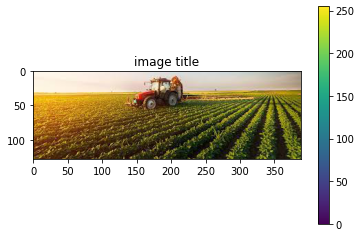

In [ ]:
#read image and show
img_path="/content/drive/MyDrive/71254_2023/02_Assignment_Submission/Orel.Soliman/HW02/images/1.jpg"
img=io.imread(img_path)
plt.imshow(img)
plt.title('image title')#title
plt.colorbar()#colorbar
org_img=img.copy()

##shape and dtype##

Shape - מראה אורך רוחב וכמות מימדים
dtype - מראה כמה יוביט התמונה



In [ ]:
img.shape


(129, 389, 3)

In [ ]:
img.dtype

dtype('uint8')

##reshape##

change size of picture

In [ ]:
img.reshape(120,380,3)
plt.imshow(img)

ValueError: ignored

##cut part of the img##

In [ ]:
clipped_img = img[0:50,150:200, :]
plt.imshow(clipped_img)

## RGB dimention 
0 red
1 green
2 blue

In [ ]:
red_layer = img[:, :, 0]

##saving img##

In [ ]:
io.imsave(fname = f'{img_path}red_img.jpg', arr=red_layer) 

NameError: ignored

##multypling image

Dont forget to transpose if neseccery

green_red_grape=np.dot(np.transpose(red_grape),green_grape)


##copy##


In [ ]:
cop_img=np.copy(img)

##sum mean std##


In [ ]:
print(np.sum(img))
print(np.mean(img))
print(np.std(img))

15925552
105.7873962920893
80.58895328748572


##pixle value mask##

In [ ]:
img_masked50 = img[img>50]
sum1=np.sum(img_masked50)
print("the number of pixles above 50:",sum1)

the number of pixles above 50: 14731408


##Grayscale and cmap and figure size##

gray scale - turn the image into 1 dimention 
cmap - paint the image, r in the end do reverse

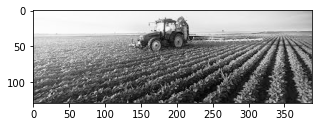

In [ ]:
import skimage.color
gray_image = skimage.color.rgb2gray(img)
plt.figure(figsize=(5,5))
plt.imshow(gray_image, cmap='Greys_r')

##subplot##

<Figure size 360x360 with 0 Axes>

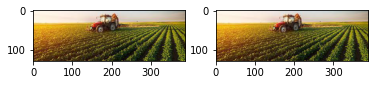

<Figure size 360x360 with 0 Axes>

In [ ]:
plt.subplot(1,2,1)
plt.imshow(img, cmap='Greens')

plt.subplot(1,2,2)
plt.imshow(img, cmap='Blues')
plt.figure(figsize=(5,5))

##glob##

Rerurns a list of file names *every file . every kind

In [ ]:
path_list = glob.glob(f'{folder_path}/images/*.*') 

NameError: ignored

#Multidimensional Arrays and Spectral Indices#

### **Preprocessing:**

In [ ]:
!pip install spectral # a library for reading hyperspectral images

In [ ]:
# our working folder
folder_path = '/content/drive/MyDrive/71254_2023/01_Lectures/Class02'

# path to the hs files
hdr_path = f"{folder_path}/images/hs"

In [ ]:
# importing the relevant libs

from spectral import imshow, view_cube, ndvi
import spectral.io.envi as envi
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import skimage.io as io

# source: https://eufat.github.io/2019/02/19/hyperspectral-image-preprocessing-with-python.html
# and: https://github.com/yehuda-yu/Image_processing/tree/main/HyperSpectral_Image_Proccesing

**Using envi.open() function we open both RAW and HDR file, we need three type of data here: dark reference, white reference and data capture:**

In [ ]:
# these file were obtained from a hyperspectral camera
dark_ref = envi.open(f'{hdr_path}/DARKREF_1341.hdr', f'{hdr_path}/DARKREF_1341.raw')
white_ref = envi.open(f'{hdr_path}/WHITEREF_1341.hdr', f'{hdr_path}/WHITEREF_1341.raw')
data_ref = envi.open(f'{hdr_path}/1341.hdr', f'{hdr_path}/1341.raw')

**With numpy, we convert the loaded data to numpy array:**

In [ ]:
white_nparr = np.array(white_ref.load())
dark_nparr = np.array(dark_ref.load())
data_nparr = np.array(data_ref.load())

**Using [correction formula](https://en.wikipedia.org/wiki/Flat-field_correction), the captured data is subtracted by dark reference and divided with white reference subtracted dark reference. To show our currently corrected image, use imshow from spectral library:**

In [ ]:
corrected_nparr = np.divide(
    np.subtract(data_nparr, dark_nparr),
    np.subtract(white_nparr, dark_nparr))

imshow(corrected_nparr, (100, 100, 100))

**Reading the bands list into a numpy array for future plotting:**

In [ ]:
bands = np.genfromtxt(f'{hdr_path}/bands.csv', delimiter=',')
bands

### **Choosing a pixel and plotting it's reflectance spectrum:** 

In [ ]:
def plot_pixel(img,pixel_y,pixel_x,bands):

  leaf_pixel = img[
      pixel_y:pixel_y+1,
      pixel_x:pixel_x+1,
      :]

  leaf_pixel_squeezed = np.squeeze(leaf_pixel)

  plt.plot(bands, leaf_pixel_squeezed)
  plt.title('Spectral Footprint\n(Pixel {},{})'.format(
      pixel_x, pixel_y),fontsize=16)
  plt.xlabel('Wavelength',fontsize=14)
  plt.ylabel('Reflectance',fontsize=14)
  plt.show()

In [ ]:
plot_pixel(corrected_nparr, 100, 100, bands)

In [ ]:
# notice the shape! How many dimensions does the image have? 204
corrected_nparr.shape

In [ ]:
def plot_several_pixel(img,pixels_tuples_array,bands):
  for pixel_xy in pixels_tuples_array:
    leaf_pixel = img[ 
      pixel_xy[1]:pixel_xy[1]+1, #y pixel
      pixel_xy[1]:pixel_xy[1]+1, #x pixel
      :]
    leaf_pixel_squeezed = np.squeeze(leaf_pixel) #squeeze

    plt.plot(bands, leaf_pixel_squeezed, label =f"x={pixel_xy[1]}, y={pixel_xy[1]}"  )
  plt.title('Spectral signature',fontsize=16)
  plt.xlabel('Wavelength',fontsize=14)
  plt.ylabel('Reflectance',fontsize=14)
  plt.legend()
  plt.show()

In [ ]:
plot_several_pixel(corrected_nparr,[(300,350),(420,450),(350,490)],bands)

### **The formula for NDVI is:**



 $$NDVI = \frac{(NIR - RED)}{(NIR + RED)}$$

In [ ]:
red_channel = corrected_nparr[:,:,87] # 651.92 nm
nir_channel = corrected_nparr[:,:,140] # 810.86 nm

NDVI = (nir_channel - red_channel) / (nir_channel + red_channel) # calc manually
vi = ndvi(corrected_nparr, 87, 140) # using the ndvi function from spectral to calc, arguments: image, red band number, nir band number

In [ ]:
plt.imshow(vi, cmap='RdYlGn') # notice the chosen colormap
plt.colorbar()
plt.title('Tomato Wall NDVI \n (RED = Band 87, NIR = Band 140)')

In [ ]:
# original rgb image
rgb_tomato_wall = io.imread(f'{hdr_path}/rgb.png')
flipped = np.fliplr(rgb_tomato_wall) # using np.fliplr() to flip the image vertically, because the hyperspectral camera always flips the image when obtained
plt.imshow(flipped)

### Calculating NDVI from two jpeg images (rgb and nir)

In [ ]:
# testing out NDVI on regular jpeg images (from security camera)
import cv2
# reading in images
white_nparr = io.imread(f'{folder_path}/images/ndvi/white_ref.jpg')
dark_nparr = io.imread(f'{folder_path}/images/ndvi/dark_ref.jpg')
data_nparr = io.imread(f'{folder_path}/images/ndvi/rgb.jpg')
nir = io.imread(f'{folder_path}/images/ndvi/nir.jpg')

# loading the first channel from each image
white_nparr = white_nparr[:,:,0]
dark_nparr = dark_nparr[:,:,0]
data_nparr = data_nparr[:,:,0]
nir = nir[:,:,0]

# correcting the original image using the references
corrected_nparr_red = np.divide(
    np.subtract(data_nparr, dark_nparr),
    np.subtract(white_nparr, dark_nparr))

corrected_nparr_nir = np.divide(
    np.subtract(nir, dark_nparr),
    np.subtract(white_nparr, dark_nparr))


nir_channel = corrected_nparr_nir
red_channel = corrected_nparr_red
np.seterr(invalid='ignore') # ignore 0/0 when dividing

# NDVI calculation
NDVI = (nir_channel - red_channel) / (nir_channel + red_channel) # calc manually

# displaying the NDVI
plt.imshow(NDVI > 0, cmap='RdYlGn') # notice the chosen colormap
plt.colorbar()
plt.title('Tomato plants NDVI')

In [ ]:
# testing restacking, to make rgbnir

def channel(rgb, channel):
  if channel == 'r':
    return rgb[:,:,0]
  if channel == 'g':
    return rgb[:,:,1]
  if channel == 'b':
    return rgb[:,:,2]

rgb = io.imread(f'{folder_path}/images/ndvi/rgb.jpg')
nir = io.imread(f'{folder_path}/images/ndvi/nir.jpg')
r = channel(rgb, 'r')
g = channel(rgb, 'g')
b = channel(rgb, 'b')

nir = nir[:,:,0]

rgbn = np.stack((r,g,b, nir),axis=-1)

print(rgbn.shape)
plt.imshow(rgbn)

### **RGB Index** - Learning how to normalize an image (convert to range from 0 to 1)



 $$ExG = 2*GREEN - RED - BLUE$$

 source: https://www.intechopen.com/chapters/74451

In [ ]:
# lets try to use a RGB index

img = io.imread(f'{folder_path}/images/corn.jpg') # read our rgb image

# display rgb
plt.imshow(img)
plt.title('RGB image')

In [ ]:
# process the image for calculating the ExG index

b,g,r= cv2.split(img) # split the images into channels
np.seterr(invalid='ignore') # ignore 0/0 when dividing

# function to normalize each channel
def normalize(img):
  return (img - np.min(img)) / (np.max(img) - np.min(img))

# you can also use img_as_float - uncomment to check
# from skimage.util import img_as_float
# image = img_as_float(img)

r,g,b = normalize(r), normalize(g), normalize(b) # normalizing all channels

exg = 2*g-r-b # calculating the index
exg_mean = np.nanmean(exg) # calc the mean of the image

# display
plt.imshow(exg, cmap='RdYlGn')
plt.colorbar()
plt.title(f'ExG Index, mean: {exg_mean:.2f}') # notice the mean printed in the title, and only 2 digits after decimal point (using a f-string). Read more about f-strings here: https://realpython.com/python-f-strings/

In [ ]:
# plotting side by side, using a subplot

# import libs
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# define figure size: width 10 and height 15
plt.figure(figsize=(10, 15))

# subplot for the RGB
ax1 = plt.subplot(121, title='Original RGB')
im1 = ax1.imshow(img) 

# subplot for the index
ax2 = plt.subplot(122, title='ExG') # notice the position, and the title
im2 = ax2.imshow(exg, cmap='RdYlGn') 


# add colorbar only to the image on the right
divider = make_axes_locatable(ax2)
colorbar_ax = divider.append_axes("right", size="5%", pad=0.05)  
plt.colorbar(im2, cax=colorbar_ax)

#MGVRI calculation#

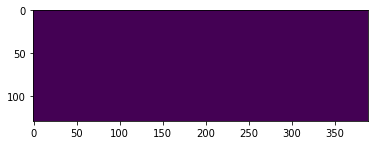

In [ ]:
#function to calculate MGVRI from a RGB image
def calc_mgvri(image):
  green=image[:,:,1]*image[:,:,1] 
  red=image[:,:,0]*image[:,:,0]
  mgvri=(green-red)/(green+red)
  return mgvri
plt.imshow(img)
org_img=img.copy()

##Show the pixles value less than value##

<ipython-input-25-17499b1a348b>:5: RuntimeWarning: invalid value encountered in true_divide
  mgvri=(green-red)/(green+red)


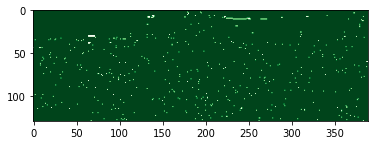

In [ ]:
mgvri_img=calc_mgvri(img)
plt.imshow(mgvri_img<100,cmap="Greens")

#Making image folder#

In [ ]:
import os # import os lib

def createDir(path):
  doesExist = os.path.exists(path) # checks whether the specified path exists
  if not doesExist:
    os.makedirs(path) # create path, since it doesn't exist
    print("The new directory was created!")

#Download an image directly from Google Image Search#



In [ ]:
# first uninstall the lib that colab has (enter 'y' to uninstall, and restart runtime)
!pip uninstall google_images_download

# then install the updated library
!pip install git+https://github.com/Joeclinton1/google-images-download.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/Joeclinton1/google-images-download.git to /tmp/pip-req-build-p_4x9_v_
  Running command git clone -q https://github.com/Joeclinton1/google-images-download.git /tmp/pip-req-build-p_4x9_v_
  Using cached selenium-4.7.2-py3-none-any.whl (6.3 MB)
  Using cached urllib3-1.26.13-py2.py3-none-any.whl (140 kB)
  Using cached trio_websocket-0.9.2-py3-none-any.whl (16 kB)
  Using cached trio-0.22.0-py3-none-any.whl (384 kB)
     |████████████████████████████████| 58 kB 1.5 MB/s 
  Created wheel for google-images-download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=16299 sha256=a4b726bb0fa6ced4668626d6be34bd57cc6605a2023883bdc3222b69fe47a5c6
  Stored in directory: /tmp/pip-ephem-wheel-cache-u9zl8s5m/wheels/50/f1/1c/089cebf505dc8e8f87f61a21a439652bc53e39ebb2c3f6767e
Successfully built google-images-download
  Attempting uninstall: urllib3
    Found ex

In [ ]:
# imports libs (again, since runtime was restarted)
import numpy as np
from matplotlib import pyplot as plt
import cv2
import skimage.io as io

# import the newly installed library
from google_images_download import google_images_download

# function to download images from Google Image Search
def downloadImagesFromGoogle(words_to_search='', number_of_imgs=3):

  response = google_images_download.googleimagesdownload() #instantiate the class
  arguments = {"keywords":words_to_search,
              "limit":number_of_imgs,"print_urls":False}
  paths = response.download(arguments)  
  print(paths) #print complete paths to the downloaded images

ModuleNotFoundError: ignored

In [ ]:
# calling our function above (images will be downloaded to the 'downloads' folder on the left)
downloadImagesFromGoogle('corn plant,watermelon plant', 3)

NameError: ignored

In [ ]:
# lets read the images we downloaded into a list
import glob
watermelon_paths = glob.glob('/content/downloads/watermelon plant/*.*') # get the paths of the watermelon images

# read images into a list
img_list = []
for path in watermelon_paths:
  img = io.imread(path)
  img_list.append(img)

In [ ]:
# displaying the downloaded images
fig, ax=plt.subplots(ncols=len(img_list), nrows=1, figsize=(8, 8))
plt.tight_layout() # nicer layout

# loop to plt.imshow all the images in one row
for i in range(len(img_list)):
  ax[i].imshow(img_list[i])
  ax[i].set_title(f'Image {i+1}')

<Figure size 576x576 with 0 Axes>

# **Histograms** #

##Using OpenCV##






**What is a histogram?**
So what is histogram ? You can consider histogram as a graph or plot, which gives you an overall idea about the intensity distribution of an image. It is a plot with pixel values (ranging from 0 to 255, not always) in X-axis and corresponding number of pixels in the image on Y-axis.

It is just **another way of understanding the image.** By looking at the histogram of an image, you get intuition about contrast, brightness and intensity distribution of that image.

This is the **function** to find the histogram:

       hist = cv.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])

Let's familiarize with the function and its parameters :


1.   **images** : it is the source image of type uint8 or float32. it should be given in square brackets, ie, "[img]".
2.   **channels** : it is also given in square brackets. It is the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.
3. **mask** : mask image. To find histogram of full image, it is given as "None". But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask.
4. **histSize** : this represents our BIN count. Need to be given in square brackets. For full scale, we pass [256].
5. **ranges** : this is our RANGE. Normally, it is [0,256]. (the hist and accumalte inside the ranges, enables to compute a single histogram from several sets of arrays.)


##### **One channel:**


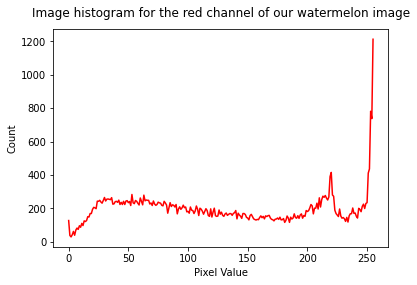

In [ ]:
# computing the histogram of the red channel of our watermelon image
img = img.copy()
hist = cv2.calcHist([img],[0],None,[256],[0,256]) # our image, first channel(0=red), no mask, 256 bins, range 0-255
  
# plot the above computed histogram
plt.plot(hist, color='r') # red color for the line
plt.title('Image histogram for the red channel of our watermelon image', y=1.03) # the y makes the title a bit higher
plt.xlabel("Pixel Value")
plt.ylabel("Count")
plt.show()



1.   Convert the image you downloaded from a url (option 1) to grayscale using: gray_image = skimage.color.rgb2gray(image). 
2. Display the histogram of the grayscale image.
3. What do you learn from the histogram? Where are most of the values?

<ipython-input-54-d407dc34d1bc>:4: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  gray_image=skimage.color.rgb2gray(img2)


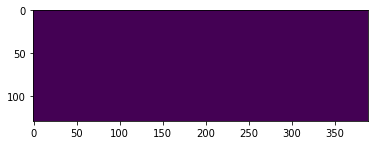

In [ ]:
#Task 1 - Convert the image you downloaded from a url (option 1) to grayscal
import skimage #import skimage
img2=img.copy()
gray_image=skimage.color.rgb2gray(img2)
plt.imshow(gray_image)

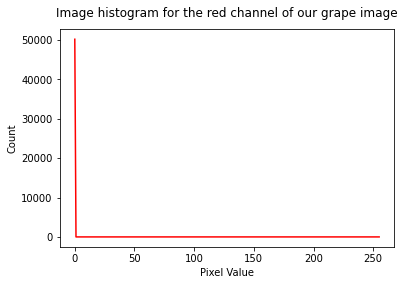

In [ ]:
#Task 2 - Display the histogram of the grayscale image
img = gray_image.copy()
img=(img/256).astype('uint8')

hist = cv2.calcHist([img],[0],None,[256],[0,256]) # our image, first channel(0=red), no mask, 256 bins, range 0-255
  
# plot the above computed histogram
plt.plot(hist, color='r') # red color for the line
plt.title('Image histogram for the red channel of our grape image', y=1.03) # the y makes the title a bit higher
plt.xlabel("Pixel Value")
plt.ylabel("Count")
plt.show()

Task 3 - 
What do you learn from the histogram? Where are most of the values?
כל הביטים בתמונה מתרכזים על הצבע האפור ולכן הגרף מציג את כל הביטים בתמונה תחת ערך זה

##### **Multiple channels:**


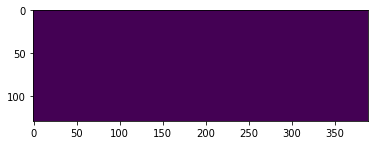

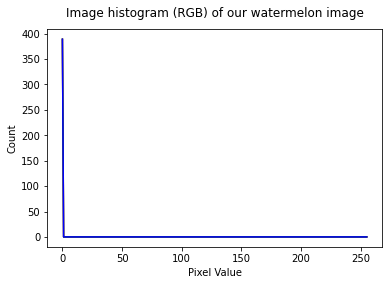

In [ ]:
# computing the histogram of all channels of our watermelon image
img2 = img.copy()

# plot the above computed histogram
colors = ('r','g','b') # for the line color

for i,color in enumerate(colors):
  hist = cv2.calcHist(img2,[i],None,[256],[0,256]) # our image, channel(0/1/2), no mask, 256 bins, range 0-255
  plt.plot(hist, color = color) # r/g/b color for each line
plt.title('Image histogram (RGB) of our watermelon image', y=1.03) # the y makes the title a bit higher
plt.xlabel("Pixel Value")
plt.ylabel("Count")
plt.show()

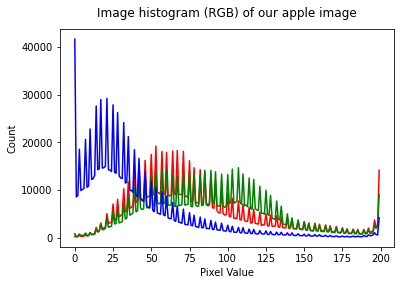

In [ ]:
#Task 3 - Display the image with less bins. What do you see now?
path_to_save_image2="/content/drive/MyDrive/71254_2023/02_Assignment_Submission/Orel.Soliman/HW03/downloaded_images/apple tree/1.gala_apple_5.jpg"
apple_image = io.imread(path_to_save_image2)
img3=apple_image.copy()

# plot the above computed histogram
colors = ('r','g','b') # for the line color

for i,color in enumerate(colors):
  hist = cv2.calcHist([img3],[i],None,[200],[0,256]) # our image, channel(0/1/2), no mask, 256 bins, range 0-255
  plt.plot(hist, color = color) # r/g/b color for each line
plt.title('Image histogram (RGB) of our apple image', y=1.03) # the y makes the title a bit higher
plt.xlabel("Pixel Value")
plt.ylabel("Count")
plt.show()
# בבינס של 256 רוב הערכים היו תחת הערוץ הכחול סביב הערך 50 ועכשיו רוב הערכים עדיין תחת הערוץ הכחול אך ירדו בערך לסביב ה 35 40

#### **Using matplotlib:**


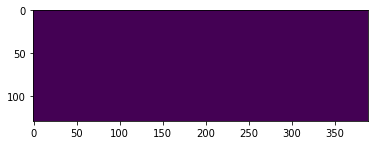

In [ ]:
# lets get an image from above
plt.imshow(img)

In [ ]:
# using plt to plot a histogram (one channel)

hist_with_plt = plt.hist(img[:,:,1].flatten(), bins = 256, color='g')
plt.title('Image histogram (green layer) of our watermelon image', y=1.03) # the y makes the title a bit higher
plt.xlabel("Pixel Value")
plt.ylabel("Pixel Count")
plt.show()

IndexError: ignored

IndexError: ignored

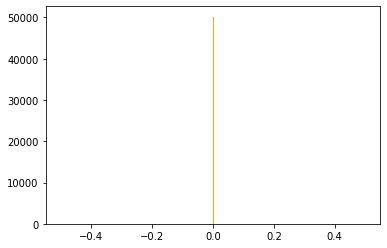

In [ ]:
# using plt to plot a histogram (multi channel)

colors = ('r','g','b') # for the line color

hist = plt.hist(img.flatten(), bins = 256, color = 'orange') # plotting the total histogram

#loop to plot for each channel
for i,color in enumerate(colors):
  hist = plt.hist(img[:, :, i].flatten(), bins = 256, color = color, alpha = 0.5)

# some more details for the figure
plt.title('Image histogram (RGB) of our watermelon image', y=1.03) # the y makes the title a bit higher
plt.xlabel("Pixel Value")
plt.ylabel("Pixel Count")
plt.legend(['Total', 'Red Channel', 'Green Channel', 'Blue Channel']) # adding a legend
plt.show()

#Operations on images#

### **Addition**

In [ ]:
# lets get two images with a black bg
import glob
images_path = '/content/drive/MyDrive/71254_2023/01_Lectures/Class03/images'
paths_list = glob.glob(f'{images_path}/addition/*.*') # paths to list
images_list = [io.imread(path) for path in paths_list] # read all images into a list in one line
print(len(images_list))
for img in images_list:
  plt.title(img.shape)
  plt.imshow(img)
  plt.show()

In [ ]:
# resize the large one (2) to the smaller one (1)
resized2 = cv2.resize(images_list[0], (481,209), interpolation = cv2.INTER_AREA)
plt.imshow(resized2)
plt.title(resized2.shape)

In [ ]:
# adding the images together
# Try to imagine the outcome before you do the actual calculation. What do you think is going to happen?

if images_list[1].shape == resized2.shape:
  added_img = images_list[1] + resized2
  plt.imshow(added_img)
  plt.title('Two images added together')
else:
  print('Shapes are different, cannot add.')



1.   Why are some of the white flowers suddenly 'colorful'?
2.   Rewrite the code, so the white flowers stay white after adding both images together. *Hint - normalize or use img_as_float.*



1.
העלים אצלי נהיו צבעונים 
כאשר אנחנו עורכים מחדש תמונה ומקטינים אותה חלק מהמידע של התמונה נעלם והתמונה יכולה להפוך להיות בהירה יותר - ובכך לשינוי הפיקסלים בתמונה שיגרום לשינוי הצבע

In [ ]:
#Task2
from skimage import img_as_float

if images_list[1].shape == resized2.shape:
  resized2=img_as_float(resized2)
  added_img = images_list[1] + resized2
  plt.imshow(added_img)
  plt.title('Two images added together')
else:
  print('Shapes are different, cannot add.')

### **Multiplication**

In [ ]:
# lets download a dark image
from skimage import img_as_float
downloadImagesFromGoogle('dark picture of cows', 1)

# read the image and display
dark_img = io.imread('/content/downloads/dark picture of cows/1.60a0787f4d2aefc97d42df1e6b49cdd2.jpg')
dark_img_float = img_as_float(dark_img.copy())
plt.imshow(dark_img_float)

In [ ]:
# using plt to plot a histogram (multi channel)
img = dark_img_float.copy()
colors = ('r','g','b') # for the line color

hist = plt.hist(img.flatten(), bins = 256, color = 'orange') # plotting the total histogram

#loop to plot for each channel
for i,color in enumerate(colors):
  hist = plt.hist(img[:, :, i].flatten(), bins = 256, color = color, alpha = 0.5)

# some more details for the figure
plt.title('Dark image histogram (RGB) of our cows image', y=1.03) # the y makes the title a bit higher
plt.xlabel("Pixel Value")
plt.ylabel("Pixel Count")
plt.legend(['Total', 'Red Channel', 'Green Channel', 'Blue Channel']) # adding a legend
plt.show()

In [ ]:
# lets lighten the image
multiplyed = dark_img_float*2
plt.imshow(multiplyed)
plt.show()
# plot the histogram

img = multiplyed.copy()
colors = ('r','g','b') # for the line color

hist = plt.hist(img.flatten(), bins = 256, color = 'orange') # plotting the total histogram

#loop to plot for each channel
for i,color in enumerate(colors):
  hist = plt.hist(img[:, :, i].flatten(), bins = 256, color = color, alpha = 0.5)

# some more details for the figure
plt.title('Dark image*2 histogram (RGB) of our cows image', y=1.03) # the y makes the title a bit higher
plt.xlabel("Pixel Value")
plt.ylabel("Pixel Count")
plt.legend(['Total', 'Red Channel', 'Green Channel', 'Blue Channel']) # adding a legend
plt.show()

ככל שנכפול תמונה בערך גבוה יותר התמונה תהיה בהירה יותר
יש לשים לב בהכפלה שלא נעבור את עומק הצבע של התמונה

In [ ]:
#multiply by 3
# lets lighten the image
multiplyed = dark_img_float*3
plt.imshow(multiplyed)
plt.show()
# plot the histogram

img = multiplyed.copy()
colors = ('r','g','b') # for the line color

hist = plt.hist(img.flatten(), bins = 256, color = 'orange') # plotting the total histogram

#loop to plot for each channel
for i,color in enumerate(colors):
  hist = plt.hist(img[:, :, i].flatten(), bins = 256, color = color, alpha = 0.5)

# some more details for the figure
plt.title('Dark image*2 histogram (RGB) of our cows image', y=1.03) # the y makes the title a bit higher
plt.xlabel("Pixel Value")
plt.ylabel("Pixel Count")
plt.legend(['Total', 'Red Channel', 'Green Channel', 'Blue Channel']) # adding a legend
plt.show()

In [ ]:
#multiply by 5
# lets lighten the image
multiplyed = dark_img_float*5
plt.imshow(multiplyed)
plt.show()
# plot the histogram

img = multiplyed.copy()
colors = ('r','g','b') # for the line color

hist = plt.hist(img.flatten(), bins = 256, color = 'orange') # plotting the total histogram

#loop to plot for each channel
for i,color in enumerate(colors):
  hist = plt.hist(img[:, :, i].flatten(), bins = 256, color = color, alpha = 0.5)

# some more details for the figure
plt.title('Dark image*2 histogram (RGB) of our cows image', y=1.03) # the y makes the title a bit higher
plt.xlabel("Pixel Value")
plt.ylabel("Pixel Count")
plt.legend(['Total', 'Red Channel', 'Green Channel', 'Blue Channel']) # adding a legend
plt.show()

In [ ]:
#multiply by 10
# lets lighten the image
multiplyed = dark_img_float*10
plt.imshow(multiplyed)
plt.show()
# plot the histogram

img = multiplyed.copy()
colors = ('r','g','b') # for the line color

hist = plt.hist(img.flatten(), bins = 256, color = 'orange') # plotting the total histogram

#loop to plot for each channel
for i,color in enumerate(colors):
  hist = plt.hist(img[:, :, i].flatten(), bins = 256, color = color, alpha = 0.5)

# some more details for the figure
plt.title('Dark image*2 histogram (RGB) of our cows image', y=1.03) # the y makes the title a bit higher
plt.xlabel("Pixel Value")
plt.ylabel("Pixel Count")
plt.legend(['Total', 'Red Channel', 'Green Channel', 'Blue Channel']) # adding a legend
plt.show()

### **Devision**

Image division operation can be used for change detection like a subtraction but instead of giving the absolute change for each pixel value from one image to another, division operation gives the fractional change or ratio between corresponding pixel values.


*   Image 1 - some objects with uneven lighting.
*   Image 2 - the same uneven lighting, without the objects.

1. Devide image 1, by image 2. Display the results. What happened?

2. Subtract image 2 from image 1. Display the results. What happened now?




In [ ]:
#Task1 - Devide image 1, by image 2. Display the results
ear_img=io.imread("/content/drive/MyDrive/71254_2023/02_Assignment_Submission/Orel.Soliman/HW03/light/ear.jpeg")
no_ear_img=io.imread("/content/drive/MyDrive/71254_2023/02_Assignment_Submission/Orel.Soliman/HW03/light/no_ear.jpeg")
ear_img=img_as_float(ear_img) #turn the image into float
no_ear_img=img_as_float(no_ear_img)
d_img=ear_img/no_ear_img #dividing
plt.imshow(d_img) # the image become much brighter



In [ ]:
#Task2 - subtract
subt_img=ear_img-no_ear_img
plt.imshow(subt_img) # subtract images 
#we subtracted the pixels value and the image become much darker

#Image Filtering#


##Mean Kernel##



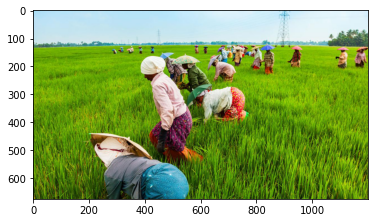

In [ ]:
path_hw04="/content/drive/MyDrive/71254_2023/02_Assignment_Submission/Orel.Soliman/HW04/"

path_to_save_img=f'{path_hw04}/agri_img.jpg'
agri_img=io.imread(path_to_save_img)
plt.imshow(agri_img)

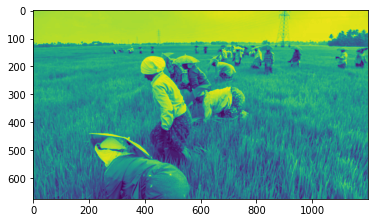

In [ ]:
#building a kernel 
from scipy import ndimage as ndi
from matplotlib import patches
import skimage
from skimage import img_as_float
mean_kernel=np.full((3,3),1/9)

mean_kernel.shape


d_agri=skimage.color.rgb2gray(agri_img)
d_f_agri=img_as_float(d_agri)

plt.imshow(ndi.correlate(d_f_agri, mean_kernel))

In [ ]:
def img_mean_kernel(image_path):
  img=io.imread(image_path)
  mean_kernel=np.full((3,3),1/9)
  mean_kernel.shape
  gray_img=skimage.color.rgb2gray(agri_img)
  gray_fil_img=img_as_float(gray_img)
  plt.imshow(ndi.correlate(d_f_agri, mean_kernel))

##Pixelated image##


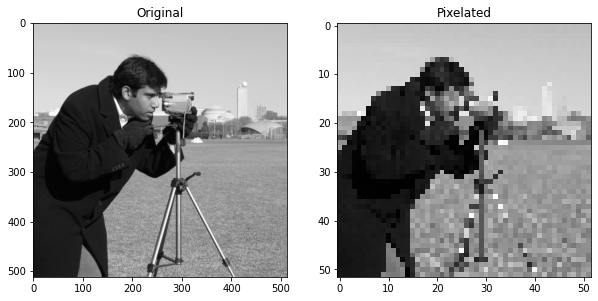

In [ ]:
from skimage import data

image = data.camera() # read in image from the skimage library
pixelated = image[0::10, 0::10] # Using the array[0::10] notation, which only considers every tenth index.

# plotting both
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 5))
ax0.imshow(image, cmap = 'gray')
ax0.title.set_text('Original') # setting a title for a subplot
ax1.imshow(pixelated, cmap = 'gray') 
ax1.title.set_text('Pixelated')

##function of showing list of image and list of titles##


In [ ]:
from skimage import img_as_float

def imshow_all(images, titles=None):
    images = [img_as_float(img) for img in images]

    if titles is None:
        titles = [''] * len(images)
    vmin = min(map(np.min, images))
    vmax = max(map(np.max, images))
    ncols = len(images)
    height = 5
    width = height * len(images)
    fig, axes = plt.subplots(nrows=1, ncols=ncols,
                             figsize=(width, height))
    for ax, img, label in zip(axes.ravel(), images, titles):
        ax.imshow(img, vmin=vmin, vmax=vmax, cmap = 'gray')
        ax.set_title(label)


##Mean Filter##

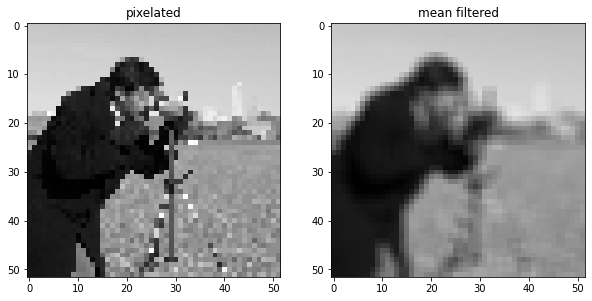

In [ ]:
filtered = ndi.correlate(pixelated, mean_kernel)
imshow_all([pixelated, filtered], titles=['pixelated', 'mean filtered'])

##Gaussian Filter##

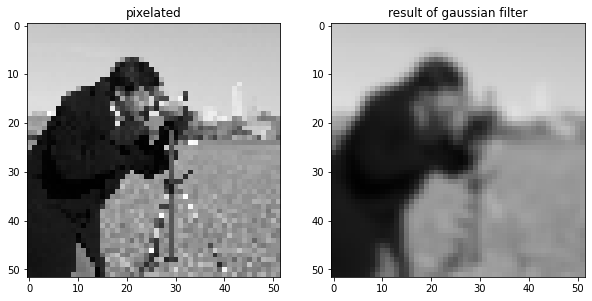

In [ ]:
# The Gaussian filter returns a float image, regardless of input.
# Cast to float so the images have comparable intensity ranges.
from skimage import filters

pixelated_float = img_as_float(pixelated)
smooth = filters.gaussian(pixelated_float, sigma=1)
imshow_all([pixelated_float, smooth],titles=['pixelated', 'result of gaussian filter'])

##Gaussian by cv2 and skimagee##

In [ ]:
# using OpenCV
# agruments: image, kernel size, sigma values, border type (padding, etc.)
# cv2.BORDER_CONSTANT adds a constant color border
gaussian_using_cv2 = cv2.GaussianBlur(img, (3,3), 0, borderType=cv2.BORDER_CONSTANT) 

# using skimage
# sigma defines the std dev of the gaussian kernel
# cval is a value to fill past edges of input if mode is ‘constant’. Default is 0.0
gaussian_using_skimage = skimage.filters.gaussian(img, sigma=1, mode='constant', cval=0.0)

<ipython-input-68-ddc3c9fb8731>:9: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  gaussian_using_skimage = skimage.filters.gaussian(img, sigma=1, mode='constant', cval=0.0)


##Unsharp mask##

Unsharp mask enhances edges by subtracting an unsharp (smoothed) version of the image from the original. Effectively making the filter a high pass filter.

enhanced image = original + amount * (original - blurred)

Amount of sharpening can be controlled via scaling factor, a multiplication factor for the sharpened signal.

skimage uses Gaussian smoothing for image blurring therefore the radius parameter in the unsharp masking filter refers to the sigma parameter of the gaussian filter.

In [ ]:
# import libs
from skimage import io, img_as_float
from skimage.filters import unsharp_mask
from skimage.filters import gaussian

# download a blured image from the web
image_url = 'https://www.streetsigns.co.il/Images/extra/c4261.jpg'
image_path_tree = '/content/blured_tree.jpg'
downloadImageFromURL(image_url, image_path_tree)



NameError: ignored

(512, 512)


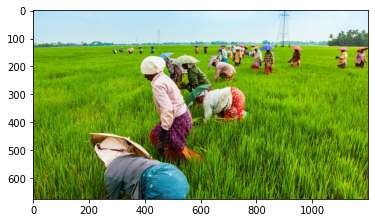

In [ ]:
# read in the image and display
img = img_as_float(agri_img)
plt.imshow(img, cmap = 'gray')
print(image.shape)

<ipython-input-75-0cee43d92379>:2: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  gaussian_img = gaussian(img, sigma=2, mode='constant', cval=0.0) # creating our blured version


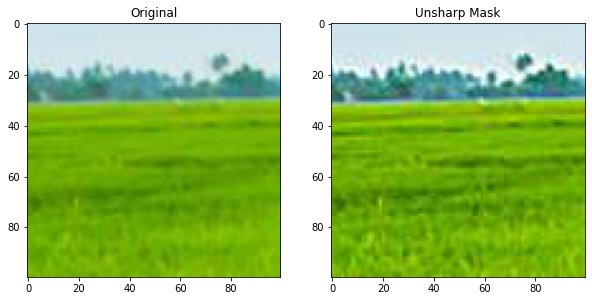

In [ ]:
# applying the Unsharp Mask
gaussian_img = gaussian(img, sigma=2, mode='constant', cval=0.0) # creating our blured version

# enhanced image = original + amount * (original - blurred)
enhanced_image = img + (img - gaussian_img)*1.

# displaying the filtered images
imshow_all([img[100:200,100:200], enhanced_image[100:200,100:200]],
           ['Original', 'Unsharp Mask'])

##Vertical kernel##


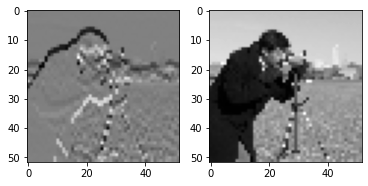

In [ ]:
# lets create a vertical kernel
vertical_kernel = np.array([
    [-1],
    [ 0],
    [ 1],
])

# convolve our above image
gradient_vertical = ndi.correlate(pixelated.astype(float),
                                  vertical_kernel)
# display
fig, ax = plt.subplots(1, 2)
ax[0].imshow(gradient_vertical, cmap='gray')
ax[1].imshow(pixelated, cmap='gray')

Horizontal Kernel and magnitude

Add a horizontal kernel to the above example to also compute the horizontal gradient,  gy 
Compute the magnitude of the image gradient at each point
$\left|g\right| = \sqrt{g_x^2 + g_y^2}$

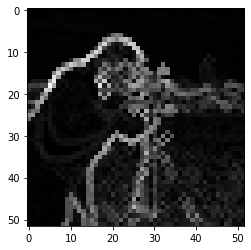

In [ ]:
import math
# lets create a horizontal kernel
horizontal_kernel = np.array([[-1,0,1]])

# convolve our above image
gradient_horizontal=ndi.correlate(pixelated.astype(float),horizontal_kernel)

#calculate magnitude
magnitude=np.zeros((pixelated.shape))
for i in range(pixelated.shape[0]):
  for j in range(pixelated.shape[1]):
    magnitude[i][j]=math.sqrt(gradient_horizontal[i][j]**2 + gradient_vertical[i][j]**2)
# display
plt.imshow(magnitude,cmap='gray')

##Sobel edge filter##

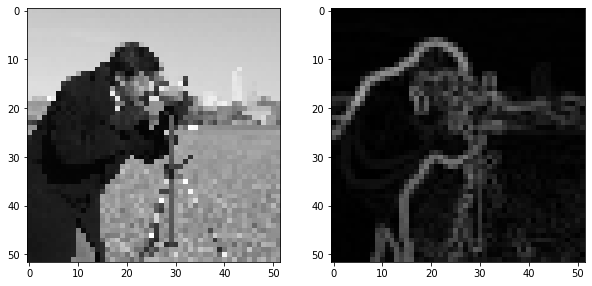

In [ ]:
pixelated_gradient = filters.sobel(pixelated)
imshow_all([pixelated, pixelated_gradient])

##Canny Edge Detector##

**The Process of Canny edge detection algorithm can be broken down to 5 different steps:**
1. Apply Gaussian filter to smooth the image in order to remove the noise
2. Find the intensity gradients of the image
3. Apply non-maximum suppression to get rid of spurious response to edge detection
4. Apply double threshold to determine potential edges (supplied by the user)
5. Track edge by hysteresis: Finalize the detection of edges by suppressing all the other edges that
are weak and not connected to strong edges.

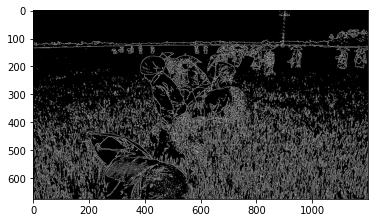

In [ ]:
# import libs
from skimage import io, filters, feature
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
import cv2
import numpy as np

# Applying Canny
canny_edge = cv2.Canny(agri_img, 195, 200)  #Supply Thresholds 1 and 2 

plt.imshow(canny_edge, cmap = 'gray')

##Canny Histogram##

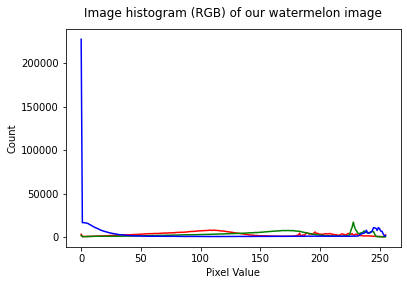

In [ ]:
# tricky, lets see the histogram
# computing the histogram of all channels of our watermelon image
img = (agri_img.copy())
# plot the above computed histogram
colors = ('r','g','b') # for the line color

for i,color in enumerate(colors):
  hist = cv2.calcHist([img],[i],None,[256],[0,256]) # our image, channel(0/1/2), no mask, 256 bins, range 0-255
  plt.plot(hist, color = color) # r/g/b color for each line
plt.title('Image histogram (RGB) of our watermelon image', y=1.03) # the y makes the title a bit higher
plt.xlabel("Pixel Value")
plt.ylabel("Count")
plt.show()

##Median filter##

[[0 1 0]
 [1 1 1]
 [0 1 0]]


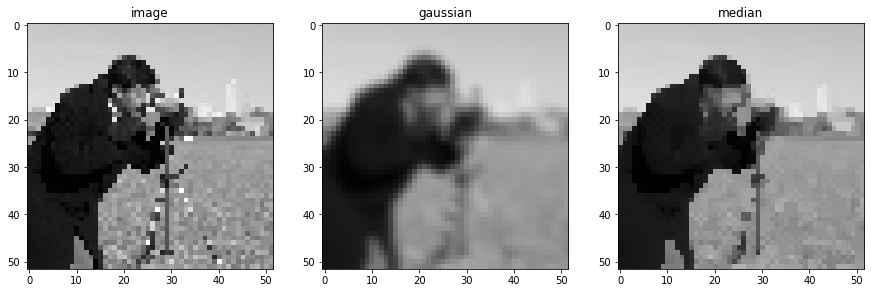

In [ ]:
# example comparing gaussian and median

#Disk creates a circular structuring element, similar to a mask with specific radius
from skimage.morphology import disk
neighborhood = disk(radius=1)  # "structuring element", matrix of ones though corners are zeroes
print(neighborhood)
median = filters.rank.median(pixelated, neighborhood) # applying the median filter, needs 8 bit, not float.

#displaying
titles = ['image', 'gaussian', 'median']
imshow_all([pixelated, smooth, median], titles=titles)

### Median and mean filter###

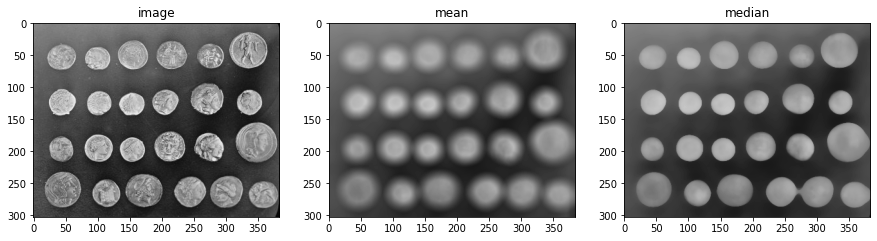

In [ ]:
# larger area
neighborhood = disk(10)

# get an image
coins = data.coins()

#calc the mean and median filters
mean_coin = filters.rank.mean(coins, neighborhood)
median_coin = filters.rank.median(coins, neighborhood)

#display
titles = ['image', 'mean', 'median']
imshow_all([coins, mean_coin, median_coin], titles=titles)

##Bilateral filter##

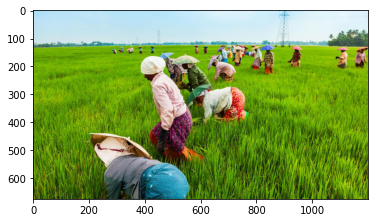

In [ ]:
# using cv2
import cv2
from skimage import img_as_ubyte


img = img_as_ubyte(agri_img)


# d - diameter of each pixel neighborhood used during filtering
# sigmaCOlor - Sigma of grey/color space. 
# sigmaSpace - Large value means farther pixels influence each other (as long as the colors are close enough)
bilateral_using_cv2 = cv2.bilateralFilter(img, 5, 20, 100, borderType=cv2.BORDER_CONSTANT)

plt.imshow(bilateral_using_cv2, cmap='gray')

##Non Local Means Filter (NLM)##

Works well for random gaussian noise but not as good for salt and pepper

The non-local means algorithm replaces the value of a pixel by an average of a selection of other pixels values: small patches centered on the other pixels are compared to the patch centered on the pixel of interest, and the average is performed only for pixels that have patches close to the current patch.

<ipython-input-96-e4056f977ef8>:28: UserWarning: Image dtype is not float. By default denoise_nl_means will assume you want to preserve the range of your image (preserve_range=True). In scikit-image 0.19 this behavior will change to preserve_range=False. To avoid this warning, explicitly specify the preserve_range parameter.
  denoise_img = denoise_nl_means(tree_img, h=1.15 * sigma_est, fast_mode=True,


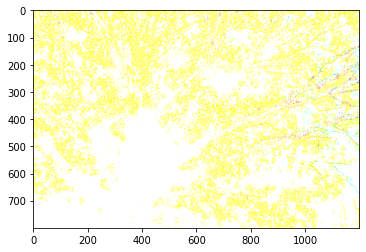

In [ ]:
# import libs
import cv2
import numpy as np
from skimage import io, img_as_float
from skimage.restoration import denoise_nl_means, estimate_sigma

path2="/content/drive/MyDrive/71254_2023/02_Assignment_Submission/Orel.Soliman/HW04/images/tree_img"

# read in your images here - change the paths
img_gaussian_noise = img_as_float(io.imread(path2, as_gray=True))
img_salt_pepper_noise = img_as_float(io.imread(path2, as_gray=True))


"""
The estimate_sigma function can provide a good starting point for setting 
the h (and optionally, sigma) parameters for the non-local means algorithm. 
h is a constant that controls the decay in patch weights as a function of the distance between patches. 
Larger h allows more smoothing between disimilar patches.
When the fast_mode argument is False, a spatial Gaussian weighting is applied 
to the patches when computing patch distances. When fast_mode is True a 
faster algorithm employing uniform spatial weighting on the patches is applied.
"""

tree_img=io.imread(path2)
### THIS IS THE CODE FOR THE NLM - change the 'img' to your images
sigma_est = np.mean(estimate_sigma(img, multichannel=True))

denoise_img = denoise_nl_means(tree_img, h=1.15 * sigma_est, fast_mode=True,
                               patch_size=5, patch_distance=3, multichannel=False)
### UNTIL HERE

#display your images
plt.imshow(denoise_img)
plt.show()

##Total variation filter (TVF)##

Works well for random gaussian noise but not as good for salt and pepper


In [ ]:
# source: https://hal.archives-ouvertes.fr/hal-00437581/document

import cv2
from skimage import io, img_as_float
from skimage.restoration import denoise_tv_chambolle
from matplotlib import pyplot as plt

# read in your image with noise
img = img_as_float(agri_img)

"""
denoise_tv_chambolle(image, weight=0.1, eps=0.0002, n_iter_max=200, multichannel=False)
weight: The greater weight, the more denoising (at the expense of fidelity to input).
eps: Relative difference of the value of the cost function that determines the stop criterion. 
n_iter_max: Max number of iterations used for optimization
"""

# applying the filter
denoise_img = denoise_tv_chambolle(img, weight=0.1, eps=0.0002, n_iter_max=200, multichannel=False)

#display
titles = ['original', 'denoised with TVF', '']
imshow_all([img, denoise_img], titles=titles)

NameError: ignored

##Interpolation##

In [ ]:
# Interpolation 
from PIL import Image
im_nearest = img.resize( (img.width*4,img_as_float.height), Image.NEAREST)

im_bilinear = img.resize( (img.width*4,img.height), Image.BILINEAR) 

im_bicubic = img.resize( (img.width*4,img.height), Image.BICUBIC) 

AttributeError: ignored

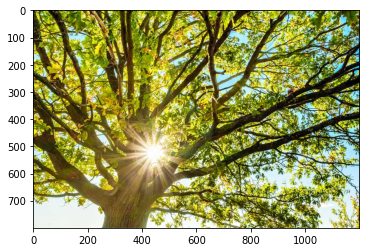

In [ ]:
tree_img=io.imread('/content/drive/MyDrive/71254_2023/02_Assignment_Submission/Orel.Soliman/HW04/images/tree_img')
plt.imshow(tree_img)

#Pixelated#

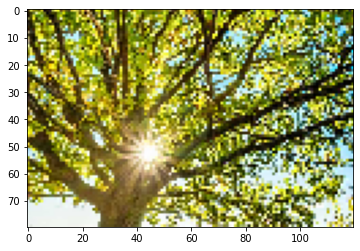

In [ ]:
pixelated_tree = tree_img[0::10, 0::10,:] # taking every 10th pixel

plt.imshow(pixelated_tree)

#Resie interpolation#

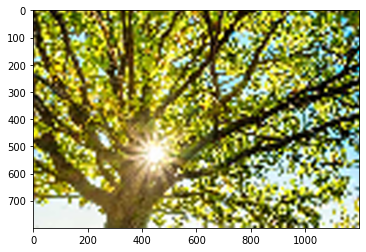

In [ ]:
#Resize the pixelated image to the dimensions of the original image, using cv2.resize

# INTER_CUBIC interpolation, change SOME_NUMBER to wanted
resize_tree = cv2.resize(pixelated_tree, (1200, 800), interpolation=cv2.INTER_CUBIC) 
plt.imshow(resize_tree)

#Segmentation#

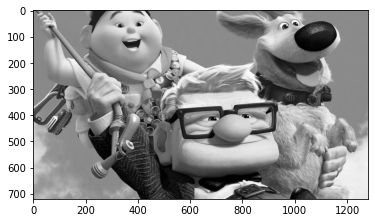

In [ ]:
import numpy as np
import skimage.io as io
import cv2 
import matplotlib.pyplot as plt

img_path = '/content/drive/MyDrive/71254_2023/02_Assignment_Submission/Orel.Soliman/HW05/up_img'
img2=img.copy()
img = io.imread(img_path, as_gray=True)
img2=img.copy()
plt.imshow(img, cmap='gray')
plt.show()


##Mask making##

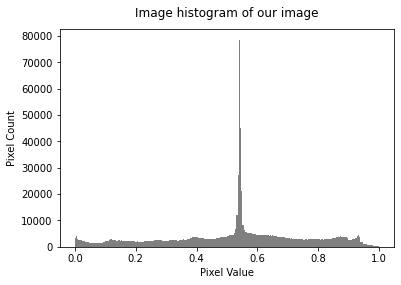

In [ ]:
# show histogram to see which pixel range is good for our rocks
hist_with_plt = plt.hist(img.flatten(), bins = 256, color='gray')
plt.title('Image histogram of our image', y=1.03) # the y makes the title a bit higher
plt.xlabel("Pixel Value")
plt.ylabel("Pixel Count")
plt.show()

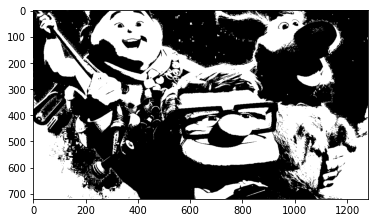

In [ ]:
rocks = (img > 0.55)
plt.imshow(rocks, cmap='gray')

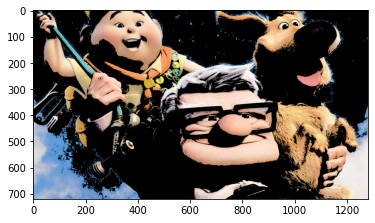

In [ ]:
# display the original image with the mask
rgb_img = io.imread(img_path, as_gray=False) # read in our image of rocks
masked_img = rgb_img.copy()

masked_img[rocks == 0] = 0 # if rocks is False, then zero the pixel in the original image
masked_img[rocks != 0] = rgb_img[rocks != 0] # if rocks is True, then leave the original image
plt.imshow(masked_img) # display

##Auto, using Otsu##

automatic thresholding

Threshold value by otsu is:  112.0


Text(0.5, 1.0, 'Our mask, using cv2+otsu')

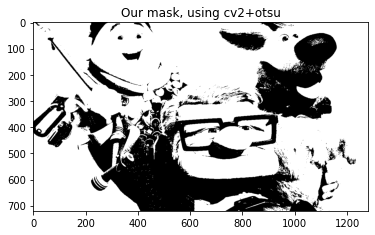

In [ ]:
# Using cv2 for otsu based automatic thresholding

from skimage import img_as_ubyte
ret2, thresh2 = cv2.threshold(img_as_ubyte(img),0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print('Threshold value by otsu is: ', ret2)

plt.imshow(thresh2, cmap='gray')
plt.title('Our mask, using cv2+otsu')

Found automatic threshold t= 0.439453125  (112.060546875)



Text(0.5, 1.0, 'Our mask, using skimage+otsu')

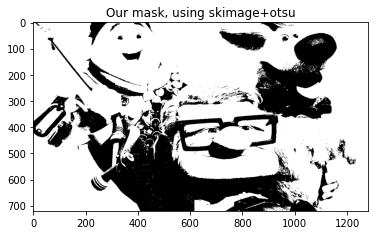

In [ ]:
# Using skimage for otsu based automatic thresholding
# The skimage.filters.threshold_otsu() function can be used to determine the threshold automatically via Otsu’s method
import skimage
import skimage.filters
# perform automatic thresholding
t = skimage.filters.threshold_otsu(img)
print("Found automatic threshold t=", t, f' ({255*t})\n')

# create a binary mask with the threshold found by Otsu's method
binary_mask = img > t

# display
plt.imshow(binary_mask, cmap='gray')
plt.title('Our mask, using skimage+otsu')

##Auto multi thresholding##

When we have couplr of tresholding to apply

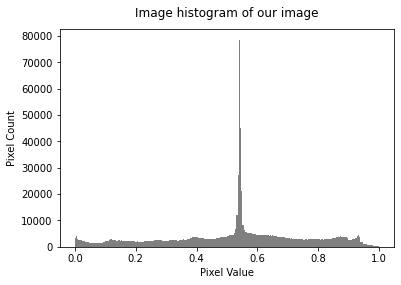

In [ ]:
# show histogram to see which pixel range is good for our rocks
hist_with_plt = plt.hist(img2.flatten(), bins = 256, color='gray')
plt.title('Image histogram of our image', y=1.03) # the y makes the title a bit higher
plt.xlabel("Pixel Value")
plt.ylabel("Pixel Count")
plt.show()

In [ ]:
#Apply multi-Otsu threshold 
from skimage.filters import threshold_multiotsu
thresholds = threshold_multiotsu(img2, classes=4)
print(thresholds)

[0.23632812 0.45898438 0.69335938]


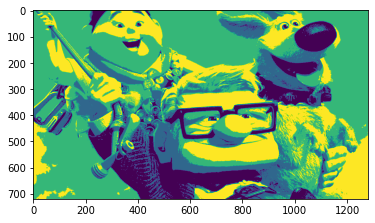

In [ ]:
regions = np.digitize(img2, bins=thresholds)
plt.imshow(regions)

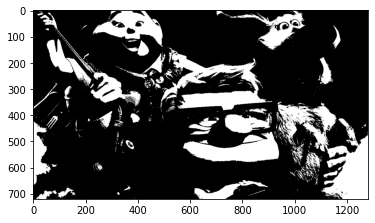

In [ ]:
# Lets take a look at region 3
plt.imshow(regions==3, cmap='gray')

#Image segmentation - fill in holes#
using Entropy

In [ ]:
#Entropy -  quantifies disorder.

# lets take a look at the right colony
from skimage.filters.rank import entropy
from skimage.morphology import disk

right_img = img.copy()[:,900:1700] # crop the right cell
right_entropy_img = entropy(right_img, disk(7)) # play with the disk size to get better results
plt.imshow(right_entropy_img)

AttributeError: ignored

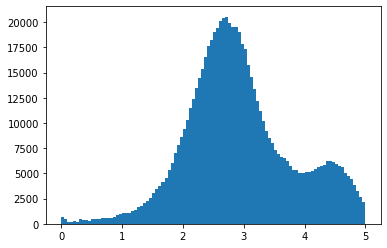

3.4390344557057313


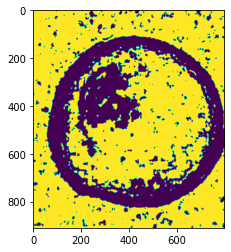

In [ ]:
#Scratch Analysis - single image

#Now let us use otsu to threshold high vs low entropy regions.
plt.hist(right_entropy_img.flat, bins=100, range=(0,5))  #.flat returns the flattened numpy array (1D)
plt.show()
right_thresh = threshold_otsu(right_entropy_img)
print(right_thresh)

#Now let us binarize the entropy image 
right_binary = right_entropy_img <= thresh

#display
plt.imshow(right_binary)

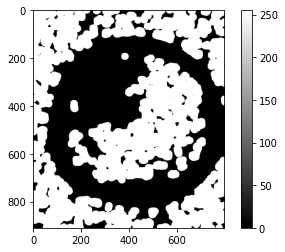

In [ ]:
# a method to fill in holes

right_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(50,50)) # define a kernel (change size if needed)
right_res = cv2.morphologyEx(img_as_ubyte(right_binary),cv2.MORPH_OPEN,kernel) # applying the kernel to our binary (make sure it's not a boolean array)

# display the results
plt.imshow(right_res, cmap='gray')
plt.colorbar()

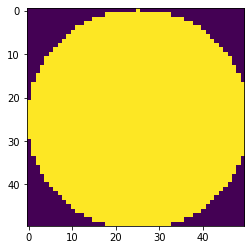

In [ ]:
plt.imshow(right_kernel)

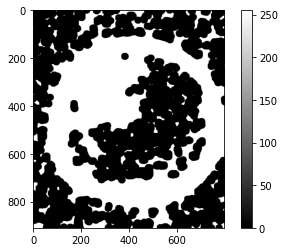

In [ ]:
# lets take invert the mask, so the colony will be with high values
# Inverting the mask by performing bitwise-not operation
right_new_mask = cv2.bitwise_not(right_res)

# display the results
plt.imshow(right_new_mask, cmap='gray')
plt.colorbar()

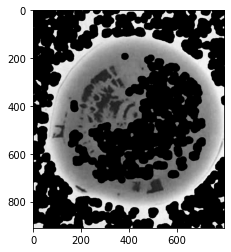

In [ ]:
# let us see the masked image
# display the results
plt.imshow(right_new_mask*right_img, cmap='gray')

#Image segmentation using color spaces#

You have a bunch of colors in your image, and you want to segment each object based on its color.

In [ ]:
# lets get a colorful image
url_image = 'https://i5.walmartimages.com/asr/00483292-9759-45f5-b278-ff2bb2cbe611.a4e61dc2974404e551a6a700bdbcdf94.jpeg'
img_path = '/content/pool.jpg'
downloadImageFromURL(url_image, img_path)

Image sucessfully Downloaded:  /content/pool.jpg


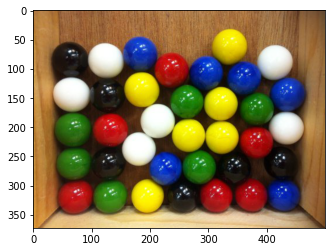

In [ ]:
# import libs
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage import io,measure

# read our image
img = io.imread(img_path)
plt.imshow(img)

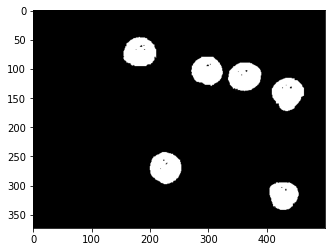

In [ ]:
# convert to hsv color space
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV) # convert rgb to hsv

mask = cv2.inRange(hsv, (100,90,90), (120,255,255)) # mask out the blue balls. range of hsv. from hsv1 to hsv2. 
# enter the link to see the hsv color space
# https://stackoverflow.com/questions/10948589/choosing-the-correct-upper-and-lower-hsv-boundaries-for-color-detection-withcv/48367205#48367205
# we chose only h and s. v we made same as s

#mask = cv2.inRange(hsv, (0,0,180), (180,70,255)) # White

# display our mask
plt.imshow(mask,cmap='gray')

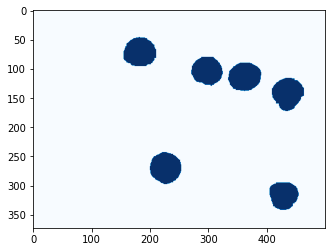

In [ ]:
# we have holes
# lets close them with the binary closing
from scipy import ndimage as nd
closed_mask = nd.binary_closing(mask, np.ones((5,5)))

# display our mask
plt.imshow(closed_mask,cmap='Blues')

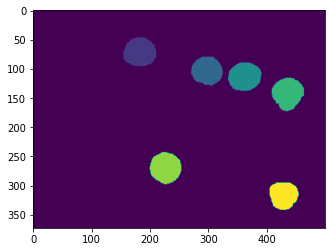

In [ ]:
# lets label our blue balls, each one will get a different color
label_image = measure.label(closed_mask)
plt.imshow(label_image)

<ipython-input-37-89fe83eb4aae>:3: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  image_label_overlay = label2rgb(label_image, image=img) # display the labels, abovee our original iamge (img)


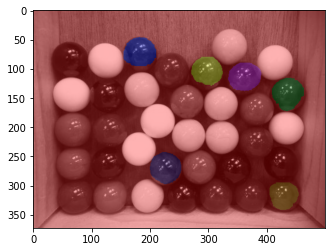

In [ ]:
# returns an RGB image where color-coded labels are painted over the image, using label2rgb
from skimage.color import label2rgb
image_label_overlay = label2rgb(label_image, image=img) # display the labels, abovee our original iamge (img)
plt.imshow(image_label_overlay)

In [ ]:
# lets get info about the blue balls (using measure)

props = measure.regionprops_table(label_image, img,
                                  properties= ['label',
                                               'area', 'equivalent_diameter', 
                                               'mean_intensity', 'solidity'])

import pandas as pd
df = pd.DataFrame(props)
print(df.head())

   label  area  equivalent_diameter  mean_intensity-0  mean_intensity-1  \
0      1  2225            53.225539         28.575730         57.924944   
1      2  2049            51.077077         16.794046         51.102977   
2      3  2189            52.793194         16.709456         46.675651   
3      4  2284            53.926609         21.630473         50.790280   
4      5  2272            53.784758         21.011884         55.031690   

   mean_intensity-2  solidity  
0        167.670112  0.969922  
1        165.565642  0.968336  
2        156.503883  0.973754  
3        154.237303  0.968617  
4        172.442782  0.973019  


#STREAMLIT#

צריך לפתוח סביבה וירטואלית 
conda create
conda activate wood

In [ ]:

import streamlit as st
import cv2
import numpy as np
import skimage.io as io
import os
import streamlit_extras
from streamlit_extras.colored_header import colored_header
import glob

os.chdir("C:/Users/Orel/Desktop/Huji/שנה ג/עיבוד תמונה/web/")

def paginator(label, items, items_per_page=10, on_sidebar=True):


    # Figure out where to display the paginator
    if on_sidebar:
        location = st.sidebar.empty()
    else:
        location = st.empty()

    # Display a pagination selectbox in the specified location.
    items = list(items)
    n_pages = len(items)
    n_pages = (len(items) - 1) // items_per_page + 1
    #page_format_func = lambda i: "Page %s" % i
    page_number = location.selectbox(label, range(n_pages), format_func=page_format_func)

    # Iterate over the items in the page to let the user display them.
    min_index = page_number * items_per_page
    max_index = min_index + items_per_page
    import itertools
    return itertools.islice(enumerate(items), min_index, max_index)



os.chdir("C:/Users/Orel/Desktop/Huji/שנה ג/עיבוד תמונה/web/")
path=os.getcwd()



page_icon = r"C:/Users/Orel/Desktop/Huji/שנה ג/עיבוד תמונה/web/favicon.png"



st.set_page_config(page_title='המרכז לתרבות העץ | ריהוט גן וסלון מעץ', page_icon = page_icon, layout = 'wide', initial_sidebar_state = 'expanded')
st.title('תרבות העץ')


   

st.title("ריהוט גן וסלון מעץ מלא")
st.subheader("הסיפור שלי")


st.markdown(
    """
    <style>
    [data-testid="stSidebar"][aria-expanded="true"] . div:first-child{
        width: 350px
    }
    h1{text-align: right;}
    [data-testid="stSidebar"][aria-expanded="false"] . div:first-child{
        width: 350px
        margin-left: -350px
    }    
    </style>
    
    """,
    unsafe_allow_html=True,


)

def add_bg_from_url():
    st.markdown(
         f"""
         <style>
         .stApp {{
             background-image: url("https://png.pngtree.com/thumb_back/fh260/back_pic/03/52/11/86579339b4ca51c.jpg");
             background-attachment: fixed;
             background-size: cover
         }}
         </style>
         """,
         unsafe_allow_html=True
     )

add_bg_from_url()
    








if b1:
    st.subheader('contact')

if b2:
    st.subheader('knowledge')

if b3:
    st.subheader('order')

if b4:
    st.subheader('Gallery')
    # side bar
    st.markdown(
        """
        <style>
        [data-testid="stSidebar"][aria-expanded="true"] . div:first-child{
            width: 350px
            }
    
        [data-testid="stSidebar"][aria-expanded="false"] . div:first-child{
            width: 350px
            margin-left: -350px
            }    
        </style>
    
        """,
        unsafe_allow_html=True,
        )

    st.sidebar.title('גלריה')
    app_mode = st.sidebar.selectbox('',['לסלון','לגינה','שולחנות גלשן','אדניות','מוביילים','מנורות'])
    if app_mode=="לסלון":
        img_ls=[]
        gallery_path="C:/Users/Orel/Desktop/Huji/שנה ג/עיבוד תמונה/web/gallery"
        ls_gallery_path=glob.glob(f'{gallery_path}/*.*')
        for path in ls_gallery_path:
            img=io.imread(path)
            img_ls.append(img)
            
            
    idx = 0 
    for _ in range(len(img_ls)-1):
        cols = st.columns(4) 
        
        if idx < len(img_ls): 
            cols[0].image(img_ls[idx], width=150)
        idx+=1
        
        if idx < len(img_ls):
            cols[1].image(img_ls[idx], width=150)
        idx+=1

        if idx < len(img_ls):
            cols[2].image(img_ls[idx], width=150)
        idx+=1 
        if idx < len(img_ls): 
            cols[3].image(img_ls[idx], width=150)
            idx = idx + 1
        else:
            break    

        # image_iterator = paginator("לסלון",img_ls)
        # indices_on_page, images_on_page = map(list, zip(*image_iterator))
        # st.image(images_on_page, width=100, caption=indices_on_page)                           

    # for idx, img in enumerate(img_ls):
    #          cols = st.columns(4)
    #          cols[0].image(img_ls[idx], use_column_width=True)
    #          idx+=1
    #          cols[1].image(img_ls[idx], use_column_width=True)
    #          idx+=idx
    #          cols[2].image(img_ls[idx], use_column_width=True)
    #          idx+=idx
    #          cols[3].image(img_ls[idx], use_column_width=True)
    #          idx+=idx
              
             
             
             
             
                 
             
             
             
             
             
             
             
                                                                    



 







#aruco#

### Measure properties with AruCo Markers

We're going to learn how to use AruCo markers to measure object area.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Fundamental before proceeding with the installation of the libraries that allow the use of Aruco Marker. In this case, you have to make sure you have installed Contrib OpenCV, attention is not enough just installing OpenCV, it has to be specifically with Contrib otherwise you may have lost file errors or something similar.

In [ ]:
!pip install opencv-contrib-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import libs
from skimage import measure, io, img_as_ubyte, morphology, util, color
import matplotlib.pyplot as plt
from skimage.color import label2rgb, rgb2gray
import numpy as np
import pandas as pd
import cv2 #aruco
import imutils #aruco

In [ ]:
# folder path - input from user (since sometimes you students forget to change this :P)
# mine (Yedidya) is: /content/drive/MyDrive/71254_2023/01_Lectures/Class07
folder_path = input('What is your folder path for this project?\n') 

What is your folder path for this project?
/content/drive/MyDrive/71254_2023/01_Lectures/Class07


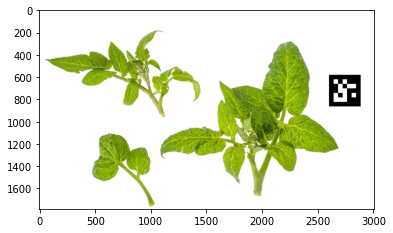

In [ ]:
# read an image
image =io.imread(f'{folder_path}/images/tomato.jpg')
grayscale = img_as_ubyte(rgb2gray(io.imread(f'{folder_path}/images/tomato.jpg')))
plt.imshow(image)

For this purpose we use Aruco Marker. It has the huge advantage of not having to calibrate the camera because we know it is an exact square of 5cm X 5cm. Beyond this OpenCV recognizes it and does not need complex operations for integration. The marker only needs to appear in the image/video along with the objects.

Now we have to load aruco detector but also the dictionary. For this tutorial I used DICT_5X5_50



In [ ]:
# Load Aruco detector
parameters = cv2.aruco.DetectorParameters_create()
aruco_dict = cv2.aruco.Dictionary_get(cv2.aruco.DICT_5X5_50)

We need to detect the aruco marker in the photo and only obtain the corners.



In [ ]:
# Get Aruco marker
corners, _, _ = cv2.aruco.detectMarkers(image, aruco_dict, parameters=parameters)

We draw a polygon around the marker to make sure we have identified it correctly.



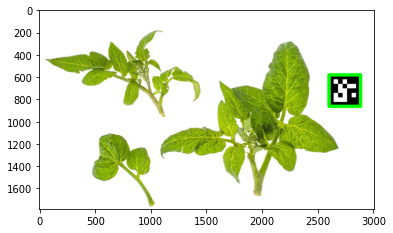

In [ ]:
# Draw polygon around the marker
int_corners = np.int0(corners)
cv2.polylines(image, int_corners, True, (0, 255, 0), 30)
plt.imshow(image)

We know that the Aruco marker used by me is a square with 5 cm per side so we have an area of 25 cm. Let's calculate the px to cm ratio.

In [ ]:
# Aruco Area
aruco_area = cv2.contourArea (corners[0])
print('AruCo Area:',aruco_area, 'px')

# Pixel to cm ratio
pixel_cm_ratio = 5*5 / aruco_area# since the AruCo is 5*5 cm, so we devide 25 cm*cm by the number of pixels
print('Ratio - Each pixel is',pixel_cm_ratio, 'cm*cm')

AruCo Area: 79806.0 px
Ratio - Each pixel is 0.0003132596546625567 cm*cm


### Segmenting with K-Means (we learned in Class 06) + Calculate Area

In [ ]:
# function to segment using k-means

def segment_image_kmeans(img, k=3, attempts=10): 

    # Convert MxNx3 image into Kx3 where K=MxN
    pixel_values  = img.reshape((-1,3))  #-1 reshape means, in this case MxN

    #We convert the unit8 values to float as it is a requirement of the k-means method of OpenCV
    pixel_values = np.float32(pixel_values)

    # define stopping criteria
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    
    _, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, attempts, cv2.KMEANS_RANDOM_CENTERS)
    
    # convert back to 8 bit values
    centers = np.uint8(centers)

    # flatten the labels array
    labels = labels.flatten()
    
    # convert all pixels to the color of the centroids
    segmented_image = centers[labels.flatten()]
    
    # reshape back to the original image dimension
    segmented_image = segmented_image.reshape(img.shape)
    
    return segmented_image, labels, centers

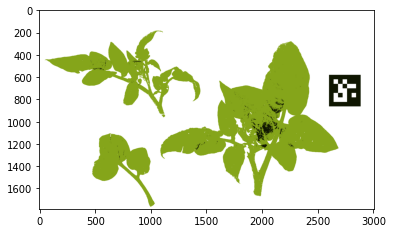

In [ ]:
# segment using kmeans
image =io.imread(f'{folder_path}/images/tomato.jpg')
k=3
attempts=10
segmented_kmeans, labels, centers = segment_image_kmeans(image, k, attempts)
plt.imshow(segmented_kmeans)

In [ ]:
print(centers)

[[133 165  26]
 [ 15  22   1]
 [255 255 255]]


In [ ]:
# lets get the index of the grass row 

for i,center in enumerate(centers):
  if np.all(center == ([133,165,26])):
    leaf_center_index = i
    print(leaf_center_index)

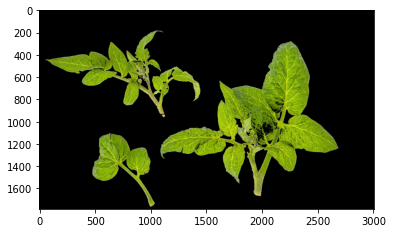

In [ ]:
# copy source img
img = image.copy()
masked_image = img.copy()

# convert to the shape of a vector of pixel values (like suits for kmeans)
masked_image = masked_image.reshape((-1, 3))

index_to_remove = leaf_center_index

# color (i.e cluster) to exclude
list_of_cluster_numbers_to_exclude = list(range(k)) # create a list that has the number from 0 to k-1
list_of_cluster_numbers_to_exclude.remove(index_to_remove) # remove the cluster of leaf that we want to keep, and not black out
for cluster in list_of_cluster_numbers_to_exclude:
  masked_image[labels== cluster] = [0, 0, 0] # black all clusters except cluster leaf_center_index

# convert back to original shape
masked_image = masked_image.reshape(img.shape)
masked_image_grayscale = rgb2gray(masked_image)

# show the image
plt.imshow(masked_image_grayscale, cmap="Greens")
plt.colorbar()

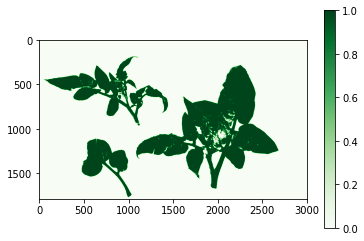

In [ ]:
# show the image
plt.imshow(masked_image_grayscale>0.1, cmap="Greens")
plt.colorbar()

Now let's apply the ratio that we've got from the AruCo marker to calculate the plant's area:

In [ ]:
# count how many pixels are in the foreground and bg
leaf_count = np.sum(np.array(masked_image_grayscale) >0)
bg_count = np.sum(np.array(masked_image_grayscale) ==0)

print('Leaf px count:', leaf_count, 'px')
print('Area:', leaf_count*pixel_cm_ratio, 'cm\N{SUPERSCRIPT TWO},', 'which is:',  f'{0.0001*leaf_count*pixel_cm_ratio:.3f}', 'm\N{SUPERSCRIPT TWO}')

Leaf px count: 1223373 px
Area: 383.233403503496 cm², which is: 0.038 m²


### web-app with streamlit 

In [ ]:
from IPython.core.display import Image
#@title 1. RUN ME FIRST - SETUP. { display-mode: "form" }
# add setup code here, such as import libs, folder, paths, functions to declare
from google.colab import files #Download image
from google.colab import drive #import drive
import shutil #move the image
from scipy import ndimage as ndi
from matplotlib import patches
import skimage
from skimage import img_as_float
import numpy as np
import skimage.io as io
import cv2 
import matplotlib.pyplot as plt
from skimage import filters
from skimage.morphology import disk
from skimage import img_as_ubyte #for Otsu
from scipy import ndimage
from skimage.feature import peak_local_max
from skimage.segmentation import watershed #watershed
import imutils

In [ ]:
#@title 2. Upload an image from your computer with AruCo marker. { display-mode: "form" }
# add code here to upload images, using google.colab.files.upload()

try:
  uploaded = files.upload()
except:
  print("")
  print("Please use Chrome, and enable cookies!")
  print("cookie אנא היכנסו דרך דפדפן כרום במחשב, והפעילו גישה לקבצי ")

# lets the user upload the file, and stores the file name in 'file_names'. The files are uploaded under /content/FILE_NAME
file_names = uploaded.keys() 
ls_img_path=list(file_names)
#shutil.move('/content/'+str(ls_img_path[0]),'/content/drive/MyDrive/71254_2023/02_Assignment_Submission/Orel.Soliman/HW06')
#des_path="/content/drive/MyDrive/71254_2023/02_Assignment_Submission/Orel.Soliman/HW07/"+ls_img_path[0]
des_path="/content/"+ls_img_path[0]

Saving Aruco.jpeg to Aruco.jpeg


Leaf px count: 140453 px
Area: 241.7955670324941 cm², which is: 0.024 m²
including AruCo marker which is 0.0004 m²


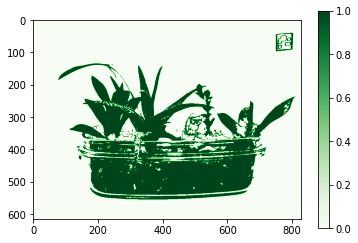

In [ ]:
#@title 3. calculate. { display-mode: "form" }
# add code here to upload images, using google.colab.files.upload()

img=io.imread(des_path)
plt.imshow(img)

# Load Aruco detector
parameters1 = cv2.aruco.DetectorParameters_create()
aruco_dict1 = cv2.aruco.Dictionary_get(cv2.aruco.DICT_5X5_50)

# Get Aruco marker
corners, _, _ = cv2.aruco.detectMarkers(img, aruco_dict1, parameters=parameters1)

# Draw polygon around the marker
int_corners = np.int0(corners)
cv2.polylines(img, int_corners, True, (0, 255, 0), 3)
plt.imshow(img)

# Aruco Area
aruco_area = cv2.contourArea (corners[0])
#print('AruCo Area:',aruco_area, 'px')

# Pixel to cm ratio
pixel_cm_ratio = 2*2 / aruco_area# since the AruCo is 5*5 cm, so we devide 25 cm*cm by the number of pixels
#print('Ratio - Each pixel is',pixel_cm_ratio, 'cm*cm')

img2=io.imread(des_path)

k=2
attempts=10
segmented_kmeans, labels, centers = segment_image_kmeans(img, k, attempts)


#print(centers)

# lets get the index of the grass row 

leaf_center_index = 1

# copy source img
img1 = img2.copy()
masked_image = img1.copy()

# convert to the shape of a vector of pixel values (like suits for kmeans)
masked_image = masked_image.reshape((-1, 3))

index_to_remove = leaf_center_index

# color (i.e cluster) to exclude
list_of_cluster_numbers_to_exclude = list(range(k)) # create a list that has the number from 0 to k-1
list_of_cluster_numbers_to_exclude.remove(index_to_remove) # remove the cluster of leaf that we want to keep, and not black out
for cluster in list_of_cluster_numbers_to_exclude:
  masked_image[labels== cluster] = [0, 0, 0] # black all clusters except cluster leaf_center_index

# convert back to original shape
masked_image = masked_image.reshape(img.shape)
masked_image_grayscale = rgb2gray(masked_image)

# show the image
plt.imshow(masked_image_grayscale>0.1, cmap="Greens")
plt.colorbar()

# count how many pixels are in the foreground and bg
leaf_count = np.sum(np.array(masked_image_grayscale) >0)
bg_count = np.sum(np.array(masked_image_grayscale) ==0)

print('Leaf px count:', leaf_count, 'px')
print('Area:', leaf_count*pixel_cm_ratio, 'cm\N{SUPERSCRIPT TWO},', 'which is:', f'{0.0001*leaf_count*pixel_cm_ratio:.3f}', 'm\N{SUPERSCRIPT TWO}')
print('including AruCo marker which is 0.0004','m\N{SUPERSCRIPT TWO}')

In [ ]:
# show the image
plt.imshow(masked_image_grayscale>0.1, cmap="Greens")
plt.colorbar()

# count how many pixels are in the foreground and bg
leaf_count = np.sum(np.array(masked_image_grayscale) >0)
bg_count = np.sum(np.array(masked_image_grayscale) ==0)

print('Leaf px count:', leaf_count, 'px')
print('Area:', leaf_count*pixel_cm_ratio, 'cm\N{SUPERSCRIPT TWO},', 'which is:',
      f'{0.0001*leaf_count*pixel_cm_ratio:.3f}', 'm\N{SUPERSCRIPT TWO}')

#MASK RCNN#

# Class 10 - Examples of Image Analysis using Pre-trained Machine Learning Models in Python

## Python tip - download an image with one line of code using wget

In [ ]:
from google.colab import drive
drive.mount('/content/drive') #import the Drive


Mounted at /content/drive


In [ ]:
img_filename = 'img_example.jpg'

# using wget(a command-line tool that makes it possible to download files) - first the direct link, and then optional, you can pass a filename.
!wget https://www.dropbox.com/s/n3xts37k5sqfgok/street.jpg -O {img_filename}

--2023-01-05 14:47:03--  https://www.dropbox.com/s/n3xts37k5sqfgok/street.jpg
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/n3xts37k5sqfgok/street.jpg [following]
--2023-01-05 14:47:04--  https://www.dropbox.com/s/raw/n3xts37k5sqfgok/street.jpg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc17b1f034cf329c97b0c580d959.dl.dropboxusercontent.com/cd/0/inline/Bz8FhNKX-uSRD6xVdepFtQ0Ys-jC39dUN4hRx4NY3A0-n8jUBVBF4Nl-WCrthYo9G7c0fVQUa6Xm_-VHMQn2USoeByCDicR8RUQ9aN53E6jjHrvYh81L0OGNKpG1zACcrNTWNXsk9KYPpG4OcfndlA5SxnqwOLlSslPzQeNCjNnkeQ/file# [following]
--2023-01-05 14:47:04--  https://uc17b1f034cf329c97b0c580d959.dl.dropboxusercontent.com/cd/0/inline/Bz8FhNKX-uSRD6xVdepFtQ0Ys-jC39dUN4hRx4NY3A0-n8jUBVBF4Nl-WCrthYo9G7c0fVQUa6Xm_-VHMQn2US

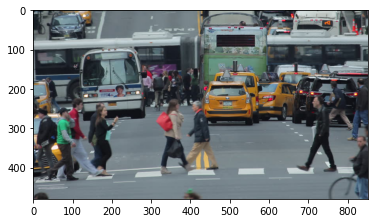

In [ ]:
from matplotlib import pyplot as plt
from skimage import io
plt.imshow(io.imread(img_filename))

## Random Forest Classifier (trainable)



A pixel-based segmentation is computed here using local features based on local intensity, edges and textures at different scales. A user-provided mask is used to identify different regions. The pixels of the mask are used to train a random-forest classifier 1 from scikit-learn. Unlabeled pixels are then labeled from the prediction of the classifier.

Source: https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_trainable_segmentation.html

## Interactive Machine Learning
Image segmentation



https://dash.gallery/dash-image-segmentation/

## Image classification

##### Copyright 2021 The TensorFlow Hub Authors.

Licensed under the Apache License, Version 2.0 (the "License");

In [ ]:
# Copyright 2021 The TensorFlow Hub Authors. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================

### Image Classification with TensorFlow Hub

In this colab, you'll try multiple image classification models from TensorFlow Hub and decide which one is best for your use case.

Because TF Hub encourages a [consistent input convention](https://www.tensorflow.org/hub/common_saved_model_apis/images#image_input) for models that operate on images, it's easy to experiment with different architectures to find the one that best fits your needs.

In [ ]:
#import libs

import tensorflow as tf
import tensorflow_hub as hub

import requests
from PIL import Image
from io import BytesIO

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#@title Helper functions for loading image (hidden)

original_image_cache = {}

def preprocess_image(image):
  image = np.array(image)
  # reshape into shape [batch_size, height, width, num_channels]
  img_reshaped = tf.reshape(image, [1, image.shape[0], image.shape[1], image.shape[2]])
  # Use `convert_image_dtype` to convert to floats in the [0,1] range.
  image = tf.image.convert_image_dtype(img_reshaped, tf.float32)
  return image

def load_image_from_url(img_url):
  """Returns an image with shape [1, height, width, num_channels]."""
  user_agent = {'User-agent': 'Colab Sample (https://tensorflow.org)'}
  response = requests.get(img_url, headers=user_agent)
  image = Image.open(BytesIO(response.content))
  image = preprocess_image(image)
  return image

def load_image(image_url, image_size=256, dynamic_size=False, max_dynamic_size=512):
  """Loads and preprocesses images."""
  # Cache image file locally.
  if image_url in original_image_cache:
    img = original_image_cache[image_url]
  elif image_url.startswith('https://'):
    img = load_image_from_url(image_url)
  else:
    fd = tf.io.gfile.GFile(image_url, 'rb')
    img = preprocess_image(Image.open(fd))
  original_image_cache[image_url] = img
  # Load and convert to float32 numpy array, add batch dimension, and normalize to range [0, 1].
  img_raw = img
  if tf.reduce_max(img) > 1.0:
    img = img / 255.
  if len(img.shape) == 3:
    img = tf.stack([img, img, img], axis=-1)
  if not dynamic_size:
    img = tf.image.resize_with_pad(img, image_size, image_size)
  elif img.shape[1] > max_dynamic_size or img.shape[2] > max_dynamic_size:
    img = tf.image.resize_with_pad(img, max_dynamic_size, max_dynamic_size)
  return img, img_raw

def show_image(image, title=''):
  image_size = image.shape[1]
  w = (image_size * 6) // 320
  plt.figure(figsize=(w, w))
  plt.imshow(image[0], aspect='equal')
  plt.axis('off')
  plt.title(title)
  plt.show()

Select an Image Classification Model. After that, some internal variables are set and the labels file is downloaded and prepared for use.

There are some technical differences between the models, like different input size, model size, accuracy, and inference time. Here you can change the model you are using until you find the one most suitable for your use case.

The handle (url) of the model is printed for your convenience. More documentation about each model is available there.

Note: All these models were trained on the ImageNet dataset

In [ ]:
#@title Select an Image Classification model

image_size = 224
dynamic_size = False

model_name = "resnet_v2_152" # @param ['efficientnetv2-s', 'efficientnetv2-m', 'efficientnetv2-l', 'efficientnetv2-s-21k', 'efficientnetv2-m-21k', 'efficientnetv2-l-21k', 'efficientnetv2-xl-21k', 'efficientnetv2-b0-21k', 'efficientnetv2-b1-21k', 'efficientnetv2-b2-21k', 'efficientnetv2-b3-21k', 'efficientnetv2-s-21k-ft1k', 'efficientnetv2-m-21k-ft1k', 'efficientnetv2-l-21k-ft1k', 'efficientnetv2-xl-21k-ft1k', 'efficientnetv2-b0-21k-ft1k', 'efficientnetv2-b1-21k-ft1k', 'efficientnetv2-b2-21k-ft1k', 'efficientnetv2-b3-21k-ft1k', 'efficientnetv2-b0', 'efficientnetv2-b1', 'efficientnetv2-b2', 'efficientnetv2-b3', 'efficientnet_b0', 'efficientnet_b1', 'efficientnet_b2', 'efficientnet_b3', 'efficientnet_b4', 'efficientnet_b5', 'efficientnet_b6', 'efficientnet_b7', 'bit_s-r50x1', 'inception_v3', 'inception_resnet_v2', 'resnet_v1_50', 'resnet_v1_101', 'resnet_v1_152', 'resnet_v2_50', 'resnet_v2_101', 'resnet_v2_152', 'nasnet_large', 'nasnet_mobile', 'pnasnet_large', 'mobilenet_v2_100_224', 'mobilenet_v2_130_224', 'mobilenet_v2_140_224', 'mobilenet_v3_small_100_224', 'mobilenet_v3_small_075_224', 'mobilenet_v3_large_100_224', 'mobilenet_v3_large_075_224']

model_handle_map = {
  "efficientnetv2-s": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_s/classification/2",
  "efficientnetv2-m": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_m/classification/2",
  "efficientnetv2-l": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_l/classification/2",
  "efficientnetv2-s-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_s/classification/2",
  "efficientnetv2-m-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_m/classification/2",
  "efficientnetv2-l-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_l/classification/2",
  "efficientnetv2-xl-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_xl/classification/2",
  "efficientnetv2-b0-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b0/classification/2",
  "efficientnetv2-b1-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b1/classification/2",
  "efficientnetv2-b2-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b2/classification/2",
  "efficientnetv2-b3-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b3/classification/2",
  "efficientnetv2-s-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_s/classification/2",
  "efficientnetv2-m-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_m/classification/2",
  "efficientnetv2-l-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_l/classification/2",
  "efficientnetv2-xl-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_xl/classification/2",
  "efficientnetv2-b0-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b0/classification/2",
  "efficientnetv2-b1-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b1/classification/2",
  "efficientnetv2-b2-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b2/classification/2",
  "efficientnetv2-b3-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b3/classification/2",
  "efficientnetv2-b0": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/classification/2",
  "efficientnetv2-b1": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b1/classification/2",
  "efficientnetv2-b2": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b2/classification/2",
  "efficientnetv2-b3": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b3/classification/2",
  "efficientnet_b0": "https://tfhub.dev/tensorflow/efficientnet/b0/classification/1",
  "efficientnet_b1": "https://tfhub.dev/tensorflow/efficientnet/b1/classification/1",
  "efficientnet_b2": "https://tfhub.dev/tensorflow/efficientnet/b2/classification/1",
  "efficientnet_b3": "https://tfhub.dev/tensorflow/efficientnet/b3/classification/1",
  "efficientnet_b4": "https://tfhub.dev/tensorflow/efficientnet/b4/classification/1",
  "efficientnet_b5": "https://tfhub.dev/tensorflow/efficientnet/b5/classification/1",
  "efficientnet_b6": "https://tfhub.dev/tensorflow/efficientnet/b6/classification/1",
  "efficientnet_b7": "https://tfhub.dev/tensorflow/efficientnet/b7/classification/1",
  "bit_s-r50x1": "https://tfhub.dev/google/bit/s-r50x1/ilsvrc2012_classification/1",
  "inception_v3": "https://tfhub.dev/google/imagenet/inception_v3/classification/4",
  "inception_resnet_v2": "https://tfhub.dev/google/imagenet/inception_resnet_v2/classification/4",
  "resnet_v1_50": "https://tfhub.dev/google/imagenet/resnet_v1_50/classification/4",
  "resnet_v1_101": "https://tfhub.dev/google/imagenet/resnet_v1_101/classification/4",
  "resnet_v1_152": "https://tfhub.dev/google/imagenet/resnet_v1_152/classification/4",
  "resnet_v2_50": "https://tfhub.dev/google/imagenet/resnet_v2_50/classification/4",
  "resnet_v2_101": "https://tfhub.dev/google/imagenet/resnet_v2_101/classification/4",
  "resnet_v2_152": "https://tfhub.dev/google/imagenet/resnet_v2_152/classification/4",
  "nasnet_large": "https://tfhub.dev/google/imagenet/nasnet_large/classification/4",
  "nasnet_mobile": "https://tfhub.dev/google/imagenet/nasnet_mobile/classification/4",
  "pnasnet_large": "https://tfhub.dev/google/imagenet/pnasnet_large/classification/4",
  "mobilenet_v2_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/classification/4",
  "mobilenet_v2_130_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4",
  "mobilenet_v2_140_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/classification/4",
  "mobilenet_v3_small_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_small_100_224/classification/5",
  "mobilenet_v3_small_075_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_small_075_224/classification/5",
  "mobilenet_v3_large_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/classification/5",
  "mobilenet_v3_large_075_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_large_075_224/classification/5",
}

model_image_size_map = {
  "efficientnetv2-s": 384,
  "efficientnetv2-m": 480,
  "efficientnetv2-l": 480,
  "efficientnetv2-b0": 224,
  "efficientnetv2-b1": 240,
  "efficientnetv2-b2": 260,
  "efficientnetv2-b3": 300,
  "efficientnetv2-s-21k": 384,
  "efficientnetv2-m-21k": 480,
  "efficientnetv2-l-21k": 480,
  "efficientnetv2-xl-21k": 512,
  "efficientnetv2-b0-21k": 224,
  "efficientnetv2-b1-21k": 240,
  "efficientnetv2-b2-21k": 260,
  "efficientnetv2-b3-21k": 300,
  "efficientnetv2-s-21k-ft1k": 384,
  "efficientnetv2-m-21k-ft1k": 480,
  "efficientnetv2-l-21k-ft1k": 480,
  "efficientnetv2-xl-21k-ft1k": 512,
  "efficientnetv2-b0-21k-ft1k": 224,
  "efficientnetv2-b1-21k-ft1k": 240,
  "efficientnetv2-b2-21k-ft1k": 260,
  "efficientnetv2-b3-21k-ft1k": 300, 
  "efficientnet_b0": 224,
  "efficientnet_b1": 240,
  "efficientnet_b2": 260,
  "efficientnet_b3": 300,
  "efficientnet_b4": 380,
  "efficientnet_b5": 456,
  "efficientnet_b6": 528,
  "efficientnet_b7": 600,
  "inception_v3": 299,
  "inception_resnet_v2": 299,
  "mobilenet_v2_100_224": 224,
  "mobilenet_v2_130_224": 224,
  "mobilenet_v2_140_224": 224,
  "nasnet_large": 331,
  "nasnet_mobile": 224,
  "pnasnet_large": 331,
  "resnet_v1_50": 224,
  "resnet_v1_101": 224,
  "resnet_v1_152": 224,
  "resnet_v2_50": 224,
  "resnet_v2_101": 224,
  "resnet_v2_152": 224,
  "mobilenet_v3_small_100_224": 224,
  "mobilenet_v3_small_075_224": 224,
  "mobilenet_v3_large_100_224": 224,
  "mobilenet_v3_large_075_224": 224,
}

model_handle = model_handle_map[model_name]

print(f"Selected model: {model_name} : {model_handle}")


max_dynamic_size = 512
if model_name in model_image_size_map:
  image_size = model_image_size_map[model_name]
  dynamic_size = False
  print(f"Images will be converted to {image_size}x{image_size}")
else:
  dynamic_size = True
  print(f"Images will be capped to a max size of {max_dynamic_size}x{max_dynamic_size}")

labels_file = "https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt"

#download labels and creates a maps
downloaded_file = tf.keras.utils.get_file("labels.txt", origin=labels_file)

classes = []

with open(downloaded_file) as f:
  labels = f.readlines()
  classes = [l.strip() for l in labels]


Selected model: resnet_v2_152 : https://tfhub.dev/google/imagenet/resnet_v2_152/classification/4
Images will be converted to 224x224


You can select one of the images below, or use your own image. Just remember that the input size for the models vary and some of them use a dynamic input size (enabling inference on the unscaled image). Given that, the method `load_image` will already rescale the image to the expected format.

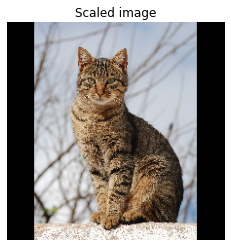

In [ ]:
#@title Select an Input Image

image_name = "cat" # @param ['tiger', 'bus', 'car', 'cat', 'dog', 'apple', 'banana', 'turtle', 'flamingo', 'piano', 'honeycomb', 'teapot']

images_for_test_map = {
    "tiger": "https://upload.wikimedia.org/wikipedia/commons/b/b0/Bengal_tiger_%28Panthera_tigris_tigris%29_female_3_crop.jpg",
    #by Charles James Sharp, CC BY-SA 4.0 <https://creativecommons.org/licenses/by-sa/4.0>, via Wikimedia Commons
    "bus": "https://upload.wikimedia.org/wikipedia/commons/6/63/LT_471_%28LTZ_1471%29_Arriva_London_New_Routemaster_%2819522859218%29.jpg",
    #by Martin49 from London, England, CC BY 2.0 <https://creativecommons.org/licenses/by/2.0>, via Wikimedia Commons
    "car": "https://upload.wikimedia.org/wikipedia/commons/4/49/2013-2016_Toyota_Corolla_%28ZRE172R%29_SX_sedan_%282018-09-17%29_01.jpg",
    #by EurovisionNim, CC BY-SA 4.0 <https://creativecommons.org/licenses/by-sa/4.0>, via Wikimedia Commons
    "cat": "https://upload.wikimedia.org/wikipedia/commons/4/4d/Cat_November_2010-1a.jpg",
    #by Alvesgaspar, CC BY-SA 3.0 <https://creativecommons.org/licenses/by-sa/3.0>, via Wikimedia Commons
    "dog": "https://upload.wikimedia.org/wikipedia/commons/archive/a/a9/20090914031557%21Saluki_dog_breed.jpg",
    #by Craig Pemberton, CC BY-SA 3.0 <https://creativecommons.org/licenses/by-sa/3.0>, via Wikimedia Commons
    "apple": "https://upload.wikimedia.org/wikipedia/commons/1/15/Red_Apple.jpg",
    #by Abhijit Tembhekar from Mumbai, India, CC BY 2.0 <https://creativecommons.org/licenses/by/2.0>, via Wikimedia Commons
    "banana": "https://upload.wikimedia.org/wikipedia/commons/1/1c/Bananas_white_background.jpg",
    #by fir0002  flagstaffotos [at] gmail.com		Canon 20D + Tamron 28-75mm f/2.8, GFDL 1.2 <http://www.gnu.org/licenses/old-licenses/fdl-1.2.html>, via Wikimedia Commons
    "turtle": "https://upload.wikimedia.org/wikipedia/commons/8/80/Turtle_golfina_escobilla_oaxaca_mexico_claudio_giovenzana_2010.jpg",
    #by Claudio Giovenzana, CC BY-SA 3.0 <https://creativecommons.org/licenses/by-sa/3.0>, via Wikimedia Commons
    "flamingo": "https://upload.wikimedia.org/wikipedia/commons/b/b8/James_Flamingos_MC.jpg",
    #by Christian Mehlführer, User:Chmehl, CC BY 3.0 <https://creativecommons.org/licenses/by/3.0>, via Wikimedia Commons
    "piano": "https://upload.wikimedia.org/wikipedia/commons/d/da/Steinway_%26_Sons_upright_piano%2C_model_K-132%2C_manufactured_at_Steinway%27s_factory_in_Hamburg%2C_Germany.png",
    #by "Photo: © Copyright Steinway & Sons", CC BY-SA 3.0 <https://creativecommons.org/licenses/by-sa/3.0>, via Wikimedia Commons
    "honeycomb": "https://upload.wikimedia.org/wikipedia/commons/f/f7/Honey_comb.jpg",
    #by Merdal, CC BY-SA 3.0 <http://creativecommons.org/licenses/by-sa/3.0/>, via Wikimedia Commons
    "teapot": "https://upload.wikimedia.org/wikipedia/commons/4/44/Black_tea_pot_cropped.jpg",
    #by Mendhak, CC BY-SA 2.0 <https://creativecommons.org/licenses/by-sa/2.0>, via Wikimedia Commons
}

img_url = images_for_test_map[image_name]
image, original_image = load_image(img_url, image_size, dynamic_size, max_dynamic_size)
show_image(image, 'Scaled image')

Now that the model was chosen, loading it with TensorFlow Hub is simple.

This also calls the model with a random input as a "warmup" run. Subsequent calls are often much faster, and you can compare this with the latency below.

*Note:* models that use a dynamic size might need a fresh "warmup" run for each image size.

In [ ]:
classifier = hub.load(model_handle)

input_shape = image.shape
warmup_input = tf.random.uniform(input_shape, 0, 1.0)
%time warmup_logits = classifier(warmup_input).numpy()

CPU times: user 4.56 s, sys: 641 ms, total: 5.2 s
Wall time: 6.7 s


Everything is ready for inference. Here you can see the top 5 results from the model for the selected image.

CPU times: user 28.4 ms, sys: 0 ns, total: 28.4 ms
Wall time: 29.4 ms
(1)  282 - tabby: 0.49945324659347534
(2)  283 - tiger cat: 0.4619178771972656
(3)  286 - Egyptian cat: 0.03827080503106117
(4)  288 - lynx: 0.0001754937693476677
(5)  289 - leopard: 1.3902898899686988e-05


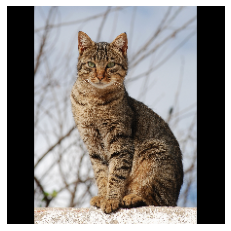

In [ ]:
# Run model on image
%time probabilities = tf.nn.softmax(classifier(image)).numpy()

top_5 = tf.argsort(probabilities, axis=-1, direction="DESCENDING")[0][:5].numpy()
np_classes = np.array(classes)

# Some models include an additional 'background' class in the predictions, so
# we must account for this when reading the class labels.
includes_background_class = probabilities.shape[1] == 1001

for i, item in enumerate(top_5):
  class_index = item if includes_background_class else item + 1
  line = f'({i+1}) {class_index:4} - {classes[class_index]}: {probabilities[0][top_5][i]}'
  print(line)

show_image(image, '')

## Object detection

In [ ]:
# let's first restart our runtime, since we're going to use a different model (only for class/teaching perposes)
import os
os.kill(os.getpid(), 9)

This example loads a pretrained YOLOv5s model and passes an image for inference. YOLOv5 accepts URL, Filename, PIL, OpenCV, Numpy and PyTorch inputs, and returns detections in torch, pandas, and JSON output formats.

In [ ]:
# instll the dependencies
!pip install -qr https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt  # install dependencies

In [ ]:
# load the model
import torch

# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

In [ ]:
# libs
from google.colab import files
from matplotlib import pyplot as plt
from skimage import io

# upload an image - you can try 'citrus.jpg' from /Class10/images
uploaded = files.upload()
img_path = list(uploaded.keys())[0]
img = io.imread(img_path)
plt.imshow(img)

In [ ]:
# List of links to images
#imgs = ['https://ultralytics.com/images/zidane.jpg']  # batch of images

# Inference
results = model(img) # accepts URL, Filename, PIL, OpenCV, Numpy..

# Results
#results.print()
results.show()  # or .save()

results.xyxy[0]  # img1 predictions (tensor)
results.pandas().xyxy[0]  # img1 predictions (pandas)



In [ ]:
# if you want, you can load an image to the model from a url, like from a image on a public google drive
file_id = '1xDbIZ7oJkdid5c7-NtFAIGEi-zSmaUFL'
gdrive_url = f'https://drive.google.com/u/1/uc?id={file_id}&export=download'

# Inference
results = model(gdrive_url)

# Results
results.show()

In [ ]:
# check if any people were detected in the image
if 'person' in results.pandas().xyxy[0]['name'].values:
  print('Person detected in image!')
else:
  print('No people detected in image.')

## Mask Rcnn

[Source](https://colab.research.google.com/drive/1e05Hw_21zl2SgcJ2clE2mWJ1wcoMXUp4)

### Preps
TF 2.9.2 -> 2.5.0

In [ ]:
import tensorflow as tf
tf.__version__

In [ ]:
!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb
!dpkg -i libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb
!ls -l /usr/lib/x86_64-linux-gnu/libcudnn.so.*
!pip install -U -qq tensorflow==2.5.0
exit() # Runtime restart required!

In [ ]:
# Notice how the TF version is now 2.5.0
import tensorflow as tf
tf.__version__

In [ ]:
# let's make sure we have a GPU, under device_type
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

In [ ]:
# our GPU card is probably Tesla T4 (what we get from Google)
!nvidia-smi

### Creating our dataset

Use https://www.makesense.ai/ for annotation. 
1. Upload plenty of images (you can get them from Google Images) for training, and label them there. Select them with polygons exactly.
2. When finished all images and labels, click on "Actions", and "Export Annotations".
3. Choose "Single file in COCO JSON format". and then "Export". 
4. Call it "train.json".
5. Do steps 1-4, for around 30% of images, and download a file called "val.json".
6. Create a folder called "dataset", the contents should look like this (in the "train" folder you should have at least 20 images, and in your "val" folder you should have at least 10 images:



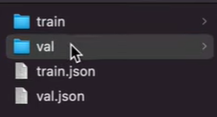

7. Save it in your Google Drive, and download it using gdown, or call it with it's path.

**Annotation example using makesense.ai**

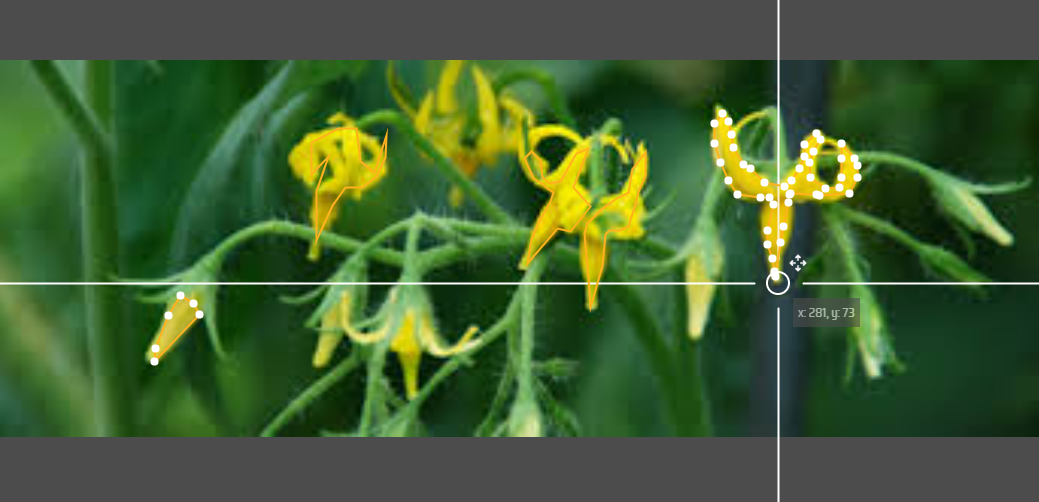

In [ ]:
# batch rename files script
# use it, if you downloaded a lot of images from google, and you want to rename them from img0 to img100 for example

# Python 3 code to rename multiple
# files in a directory or folder

# importing os module
import os

# Function to rename multiple files
def main():

	folder = "/content/drive/MyDrive/71254_2023/01_Lectures/Class10/mask_rcnn/dataset/test"
	for count, filename in enumerate(os.listdir(folder)):
		dst = f"image{str(count)}.jpg"
		src =f"{folder}/{filename}" # foldername/filename, if .py file is outside folder
		dst =f"{folder}/{dst}"
		
		# rename() function will
		# rename all the files
		os.rename(src, dst)

# Driver Code
if __name__ == '__main__':
	
	# Calling main() function
	main()


In [ ]:
# cloning the MASK-RCNN repo
!git clone https://github.com/kairess/Mask_RCNN

In [ ]:
!git clone https://github.com/deedeeharris/Mask_RCNN

In [ ]:
# import libs
import os
import sys
import json
import numpy as np
import time
from PIL import Image, ImageDraw

ROOT_DIR = 'Mask_RCNN'

sys.path.append(ROOT_DIR) 
from mrcnn.config import Config
import mrcnn.utils as utils
from mrcnn import visualize
import mrcnn.model as modellib

In [ ]:
# Download the pretrained model
# This will default to sub-directories in your mask_rcnn_dir, but if you want them somewhere else, updated it here.

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")

# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

### Configuration

- NAME: weights, tensorboard (Save folder name)
- IMAGES_PER_GPU: (batch size)
- LEARNING_RATE
- NUM_CLASSES: Number of classes to learn (requires background +1)

In [ ]:
class TrainConfig(Config):
    # Give the configuration a recognizable name
    NAME = "custom"

    # Train on 1 GPU and 1 image per GPU. Batch size is 1 (GPUs * images/GPU).
    GPU_COUNT = 1
    IMAGES_PER_GPU = 5

    LEARNING_RATE = 0.001

    # Number of classes (including background) - IMPORTANT TO CHANGE ACCORDING TO YOUR LABELS IN YOUR JSON
    NUM_CLASSES = 1 + 1  # background + 1 (flowers)

    # All of our training images are 1920x1012
    IMAGE_MIN_DIM = 512
    IMAGE_MAX_DIM = 512
    
    # Matterport originally used resnet101, but I downsized to fit it on my graphics card
    BACKBONE = 'resnet50' # resnet50

    # To be honest, I haven't taken the time to figure out what these do
    RPN_ANCHOR_SCALES = (32, 64, 128, 256, 512)
    TRAIN_ROIS_PER_IMAGE = 32
    MAX_GT_INSTANCES = 50 
    POST_NMS_ROIS_INFERENCE = 500 
    POST_NMS_ROIS_TRAINING = 1000 
    
config = TrainConfig()
config.display()

### Define the dataset

In [ ]:
class CocoLikeDataset(utils.Dataset):
    """ Generates a COCO-like dataset, i.e. an image dataset annotated in the style of the COCO dataset.
        See http://cocodataset.org/#home for more information.
    """
    def load_data(self, annotation_json, images_dir):
        """ Load the coco-like dataset from json
        Args:
            annotation_json: The path to the coco annotations json file
            images_dir: The directory holding the images referred to by the json file
        """
        # Load json from file
        json_file = open(annotation_json)
        coco_json = json.load(json_file)
        json_file.close()
        
        # Add the class names using the base method from utils.Dataset
        source_name = "coco_like"
        for category in coco_json['categories']:
            class_id = category['id']
            class_name = category['name']
            if class_id < 1:
                print('Error: Class id for "{}" cannot be less than one. (0 is reserved for the background)'.format(class_name))
                return
            
            self.add_class(source_name, class_id, class_name)
        
        # Get all annotations
        annotations = {}
        for annotation in coco_json['annotations']:
            image_id = annotation['image_id']
            if image_id not in annotations:
                annotations[image_id] = []
            annotations[image_id].append(annotation)
        
        # Get all images and add them to the dataset
        seen_images = {}
        for image in coco_json['images']:
            image_id = image['id']
            if image_id in seen_images:
                print("Warning: Skipping duplicate image id: {}".format(image))
            else:
                seen_images[image_id] = image
                try:
                    image_file_name = image['file_name']
                    image_width = image['width']
                    image_height = image['height']
                except KeyError as key:
                    print("Warning: Skipping image (id: {}) with missing key: {}".format(image_id, key))
                
                image_path = os.path.abspath(os.path.join(images_dir, image_file_name))
                image_annotations = annotations[image_id]
                
                # Add the image using the base method from utils.Dataset
                self.add_image(
                    source=source_name,
                    image_id=image_id,
                    path=image_path,
                    width=image_width,
                    height=image_height,
                    annotations=image_annotations
                )
                
    def load_mask(self, image_id):
        """ Load instance masks for the given image.
        MaskRCNN expects masks in the form of a bitmap [height, width, instances].
        Args:
            image_id: The id of the image to load masks for
        Returns:
            masks: A bool array of shape [height, width, instance count] with
                one mask per instance.
            class_ids: a 1D array of class IDs of the instance masks.
        """
        image_info = self.image_info[image_id]
        annotations = image_info['annotations']
        instance_masks = []
        class_ids = []
        
        for annotation in annotations:
            class_id = annotation['category_id']
            mask = Image.new('1', (image_info['width'], image_info['height']))
            mask_draw = ImageDraw.ImageDraw(mask, '1')
            for segmentation in annotation['segmentation']:
                mask_draw.polygon(segmentation, fill=1)
                bool_array = np.array(mask) > 0
                instance_masks.append(bool_array)
                class_ids.append(class_id)

        mask = np.dstack(instance_masks)
        class_ids = np.array(class_ids, dtype=np.int32)
        
        return mask, class_ids

### Create the Training and Validation Datasets
Make sure you download the training dataset linked at the top of this notebook. If you put the dataset somewhere else, update the paths below.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
root_folder = r'/content/drive/MyDrive/71254_2023/01_Lectures/Class10/mask_rcnn'

dataset_train = CocoLikeDataset()
dataset_train.load_data(f'{root_folder}/dataset/train.json', f'{root_folder}/dataset/train/')
dataset_train.prepare()

dataset_val = CocoLikeDataset()
dataset_val.load_data(f'{root_folder}/dataset/val.json', f'{root_folder}/dataset/val/')
dataset_val.prepare()

image_ids = np.random.choice(dataset_train.image_ids, 4)

print('Train', len(dataset_train.image_ids))
print('Validation', len(dataset_val.image_ids))

for image_id in image_ids:
    image = dataset_train.load_image(image_id)
    mask, class_ids = dataset_train.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset_train.class_names)

In [ ]:
dataset_train.class_names

### Create the Training Model
This code is largely borrowed from the train_shapes.ipynb notebook.

In [ ]:
model = modellib.MaskRCNN(
    mode="training",
    config=config,
    model_dir=MODEL_DIR)

model.load_weights(
    COCO_MODEL_PATH,
    by_name=True,
    exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", "mrcnn_bbox", "mrcnn_mask"])

### Training

Train in two stages:

1. Only the heads. Here we're freezing all the backbone layers and training only the randomly initialized layers (i.e. the ones that we didn't use pre-trained weights from MS COCO). To train only the head layers, pass layers='heads' to the train() function.

2. Fine-tune all layers. For this simple example it's not necessary, but we're including it to show the process. Simply pass layers="all to train all layers.

#### 1. Head Only

In [ ]:
# Train the head branches
# Passing layers="heads" freezes all layers except the head
# layers. You can also pass a regular expression to select
# which layers to train by name pattern.
start_train = time.time()

model.train(
    dataset_train,
    dataset_val, 
    learning_rate=config.LEARNING_RATE, 
    epochs=30, 
    layers='heads')

end_train = time.time()
minutes = round((end_train - start_train) / 60, 2)

print(f'Training took {minutes} minutes')

#### 2. All layers

Optional

In [ ]:
# Fine tune all layers
# Passing layers="all" trains all layers. You can also 
# pass a regular expression to select which layers to
# train by name pattern.
start_train = time.time()

model.train(
    dataset_train,
    dataset_val, 
    learning_rate=config.LEARNING_RATE / 10,
    epochs=20, 
    layers="all")

end_train = time.time()
minutes = round((end_train - start_train) / 60, 2)

print(f'Training took {minutes} minutes')

### Save trained model to disk

In [ ]:
# download the trained model to disk

import shutil

original = r'/content/Mask_RCNN/logs/custom20221228T1436/mask_rcnn_custom_0030.h5'
target = r'/content/drive/MyDrive/71254_2023/01_Lectures/Class10/mask_rcnn/mask_rcnn_custom_0030_28122022_flowers.h5'

shutil.copyfile(original, target)

### Prepare to run Inference

Create a new InferenceConfig, then use it to create a new model.

In [ ]:
# mount drive first
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
class InferenceConfig(TrainConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    DETECTION_MIN_CONFIDENCE = 0.65 # CHANGE HERE IF YOU WANT

inference_config = InferenceConfig()

# Recreate the model in inference mode
test_model = modellib.MaskRCNN(
    mode="inference", 
    config=inference_config,
    model_dir=MODEL_DIR)

model_path = test_model.find_last()
print(model_path)

test_model.load_weights(model_path, by_name=True)

### Run Inference

In [ ]:
import skimage

mask_colors = [
    (0., 0., 0.), # Background
    (1., 0., 0.), # Red
    (0., 1., 0.)  # Green
]

real_test_dir = f'{root_folder}/dataset/test'
image_paths = []

for filename in os.listdir(real_test_dir):
    if os.path.splitext(filename)[1].lower() in ['.png', '.jpg', '.jpeg']:
        image_paths.append(os.path.join(real_test_dir, filename))

for image_path in image_paths:
    img = skimage.io.imread(image_path)
    img_arr = np.array(img)

    results = test_model.detect([img_arr], verbose=1)
    r = results[0]

    colors = tuple(np.take(mask_colors, r['class_ids'], axis=0))

    visualize.display_instances(img, r['rois'], r['masks'], r['class_ids'], 
                                dataset_val.class_names, r['scores'], figsize=(16, 8),
                                colors=colors)

### Run on one image

In [ ]:
# libs
from google.colab import files
from matplotlib import pyplot as plt
from skimage import io

# upload an image 
uploaded = files.upload()
img_path = list(uploaded.keys())[0]
img = io.imread(img_path)
plt.imshow(img)

In [ ]:
# or download from URL using wget
!wget https://www.seipasa.com/files/images/img_flor-de-tomate.jpg -O flower.jpg
img = io.imread('flower.jpg')
plt.imshow(img)

In [ ]:
import skimage

mask_colors = [
    (0., 0., 0.), # Background (class 0)
    (1., 0., 0.)#, # Flower (class 1)
    #(0., 1., 0.)  # Add here, for other classes
]


img_arr = np.array(img)

results = test_model.detect([img_arr], verbose=1)
r = results[0]

colors = tuple(np.take(mask_colors, r['class_ids'], axis=0))

visualize.display_instances(img, r['rois'], r['masks'], r['class_ids'], 
                            dataset_val.class_names, r['scores'], figsize=(16, 8),
                            colors=colors)

In [ ]:
# playing around with the results.
# the results is a dictionary
r.keys()

In [ ]:
# let's access the dictionary values
masks = r.get("masks")
class_ids = r.get("class_ids")
scores = r.get("scores")

In [ ]:
# these are the scores (remember, we could of changed the minimum score up top)
scores

In [ ]:
# displaying a mask for example
plt.imshow(masks[:,:,5])

In [ ]:
# let's try to mask out the backgruond
total_mask = masks[:,:,0].copy()
for i in range(len(scores)):
  total_mask = total_mask + masks[:,:,i]
plt.imshow(total_mask)

In [ ]:
# convert mask shape from (500,840) to (500,840,3) 
threeD_mask = np.stack((total_mask, total_mask, total_mask),axis=-1)

In [ ]:
# display the flowers segmented
plt.imshow(threeD_mask*img)